# Part 1- Regression 

Code example to predict prices of Airbnb vacation rentals, using scikit-learn on Spark.

The Jupyter notebook icontains examples to run regression estimators on the Inside Airbnb listings dataset from Denver. The target variable is the price of the listing. 

The link to Dataset-
http://insideairbnb.com/get-the-data.html  (Search for Denver)
This dataset was scraped on 30th September 2019 and has the acytual listings with exact locations, dates and price .

In this project, we are trying to predict the price of a listing by considering all the mentioned details

In [1]:
#Import all the libraries

import pandas as pd
import numpy as np
import descartes
import matplotlib.pyplot as plt
#import geopandas as gpd
#from shapely.geometry import Point, Polygon
import os
import statsmodels
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p
from math import radians, cos, sin, asin, sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from  sklearn.linear_model import Ridge


from sklearn.model_selection import cross_val_score
from sklearn import linear_model
# for pre-0.18 versions of scikit, use:


from sklearn.linear_model import SGDRegressor

from sklearn.neighbors import KNeighborsRegressor

from tqdm import tqdm
from sklearn.svm import SVR

from tqdm import tqdm
from sklearn.svm import SVR


%matplotlib inline

In [2]:
#Change the working directory to Airbnb folder
os.chdir("C://Users//gowri//Desktop//MachineLearning")


In [3]:
#Read the Listings data for Denver

listings=pd.read_csv("listings.csv")
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,360,https://www.airbnb.com/rooms/360,2.019060e+13,6/29/2019,LoHi Secret garden at the Chickadee Cottage,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,none,those who are interested in our local brews - ...,...,t,f,moderate,t,t,3,3,0,0,5.51
1,364,https://www.airbnb.com/rooms/364,2.019060e+13,6/29/2019,Lodo / RiNo LOFT via airport train,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",none,"Ten brewpubs within walking distance, two grea...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.71
2,590,https://www.airbnb.com/rooms/590,2.019060e+13,6/29/2019,Comfortable - and a great value!,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",none,I love the diversity of my neighborhood and it...,...,f,f,flexible,f,f,2,0,2,0,4.57
3,592,https://www.airbnb.com/rooms/592,2.019060e+13,6/29/2019,private,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,none,NaN,...,f,f,flexible,f,f,2,0,2,0,1.38
4,686,https://www.airbnb.com/rooms/686,2.019060e+13,6/29/2019,Alexandra's Uptown Queen Bed Room,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,none,"I love my Uptown neighborhood, which is within...",...,t,f,moderate,f,f,2,0,2,0,4.70


In [4]:
print(listings.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)


In [5]:
listings.shape

(4511, 106)

# Data Cleaning and Exploration

In [6]:
# Clean numeric fields
num_feats = ['cleaning_fee', 'extra_people', 'price']
listings[num_feats] = listings[num_feats].replace('[\$,]', '', regex=True) #Remove $ sign before the prices
listings[num_feats] = listings[num_feats].apply(pd.to_numeric, errors='coerce') #Converting the prce data to numeric
print("Dataset has {} rows, {} columns.".format(*listings.shape)) #Shape of the Dataset

Dataset has 4511 rows, 106 columns.


In [7]:
#Sum of NA values in the dataset (Missing values)

listings.isnull().sum()[listings.isnull().sum()>0]

summary                           73
space                            652
description                       35
neighborhood_overview            828
notes                           1602
transit                          946
access                          1059
interaction                      926
house_rules                     1110
thumbnail_url                   4511
medium_url                      4511
xl_picture_url                  4511
host_name                          2
host_since                         2
host_location                      8
host_about                      1471
host_response_time               522
host_response_rate               522
host_acceptance_rate            4511
host_is_superhost                  2
host_thumbnail_url                 2
host_picture_url                   2
host_neighbourhood               542
host_listings_count                2
`                                  2
``                                 2
host_identity_verified             2
n

In [8]:
#Different Type of Rooms available in Denver
roomType_DF=listings.groupby('room_type').id.count()
roomType_DF=roomType_DF.reset_index()
roomType_DF=roomType_DF.rename(columns={'id':'number_Of_Listings'})
roomType_DF

,room_type,number_Of_Listings
0,Entire home/apt,3300
1,Private room,1113
2,Shared room,98


As we can see, most of the listings are Entire home/Apt or Private Rooms.

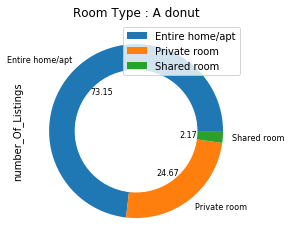

In [9]:
# Create a pieplot

roomType_DF.plot.pie(y='number_Of_Listings',fontsize = 8, autopct = '%.2f',labels=(roomType_DF['room_type']))

my_circle=plt.Circle( (0,0), 0.7, color='white') # add a circle at the center
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Room Type : A donut')
plt.show()

In [10]:
# the number of entries with 0 'number_of_reviews' which do not a NaN for 'reviews_per_month'
len(listings[(listings.number_of_reviews == 0) & (pd.isnull(listings.number_of_reviews) == False)
       & (pd.isnull(listings.reviews_per_month) == False)].index)

0

In [11]:
# the number of entries with at least 1 'number_of_reviews' which have a NaN for 'reviews_per_month'
len(listings[(listings.number_of_reviews != 0) & (pd.isnull(listings.number_of_reviews) == False)
       & (pd.isnull(listings.reviews_per_month) == True)].index)

0

In [12]:
# so we need to do some cleaning.

# first fixup 'reviews_per_month' where there are no reviews
listings['reviews_per_month'].fillna(listings['reviews_per_month'].mean(), inplace=True)

In [13]:
# remove the $ from the price and convert to float
listings['price'] = listings['price'].replace('[\$,)]','',  \
        regex=True).replace('[(]','-', regex=True).astype(float)
listings.price.head(5)

0    140.0
1    179.0
2     61.0
3     42.0
4     70.0
Name: price, dtype: float64

Text(0, 0.5, 'Number of listings')

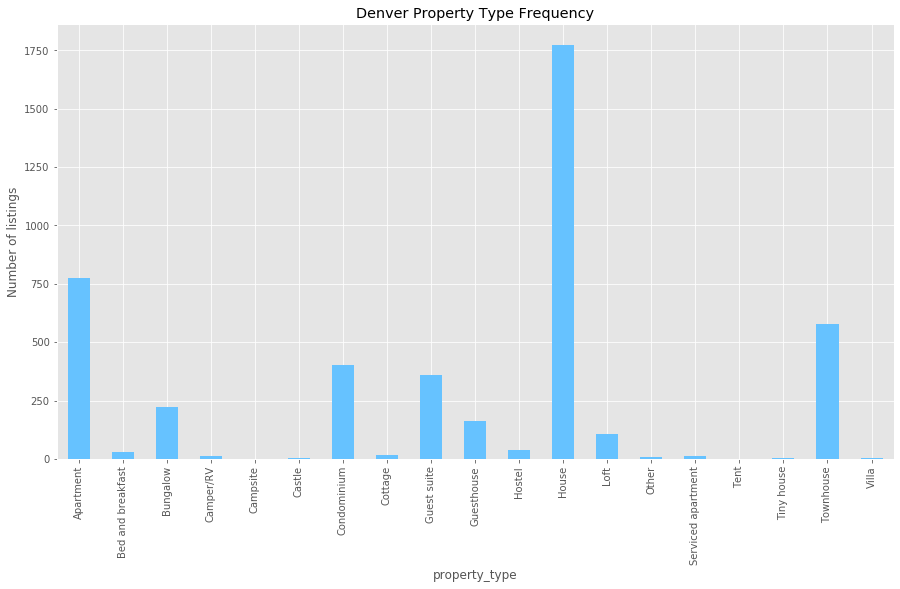

In [14]:

plt.style.use('ggplot')

propertytype_DF = listings.groupby('property_type').id.count()
propertytype_DF= propertytype_DF.reset_index()
propertytype_DF=propertytype_DF.rename(columns={'id':'Number_Of_Listings'})

objects = propertytype_DF['property_type']
y_pos = propertytype_DF['Number_Of_Listings']

propertytype_DF.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Denver Property Type Frequency', 
           legend = False)
plt.ylabel('Property Type')
plt.ylabel('Number of listings')

Almost half of the listings are Houses. We also have apartments and condominiums listed. 

In [15]:
listings.groupby('neighbourhood_cleansed')['availability_365'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Athmar Park,21.0,105.190476,120.914275,0.0,19.00,53.0,130.00,336.0
Auraria,5.0,168.800000,148.063162,8.0,20.00,213.0,266.00,337.0
Baker,109.0,124.752294,117.573157,0.0,20.00,84.0,223.00,356.0
Barnum,18.0,120.277778,122.028350,0.0,20.25,75.5,242.75,335.0
Barnum West,23.0,269.304348,120.461022,15.0,154.00,335.0,357.00,364.0
...,...,...,...,...,...,...,...,...
West Colfax,130.0,130.123077,122.063588,0.0,22.25,95.0,253.50,361.0
West Highland,149.0,130.993289,119.174781,0.0,17.00,103.0,231.00,365.0
Westwood,5.0,87.800000,136.270687,0.0,5.00,45.0,62.00,327.0


Location and neighborhood are the two main factors one chooses as a place to stay. Above table shows the mean, min and max nprice distribution for neighboorhoods in Denver.
The neighborhoods near downtown Denver has more listings as it is the center for many events and activities in the city. Hence, I would like to focus our analysis and prediction on listings close to Denver Downtown.

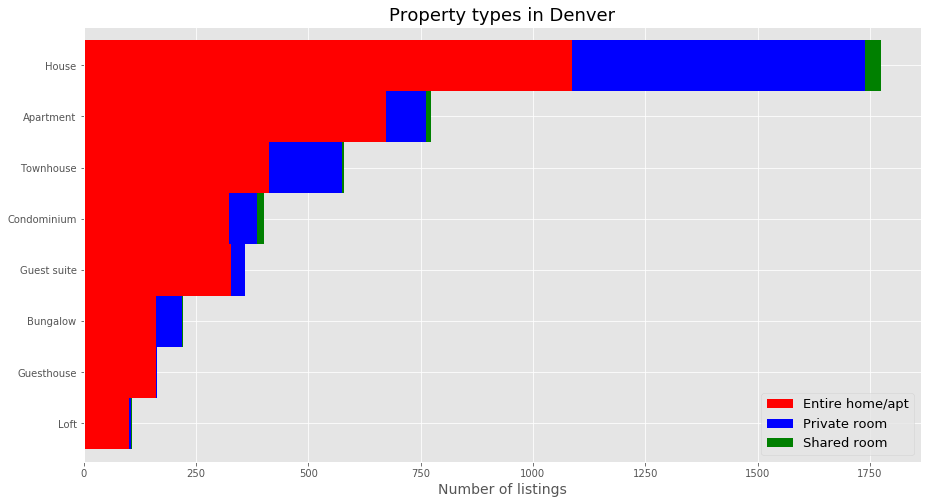

In [16]:
prop = listings.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Denver', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

Above plot shows different property types in Denver and what kind of housing (shared/ entire home,etc) are available.

In [17]:
#Price Analysis/ Distribution

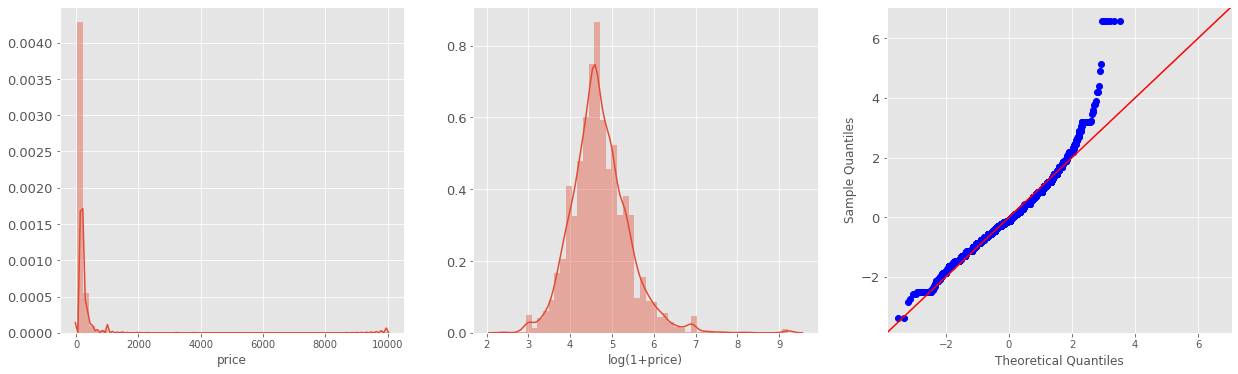

In [18]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(listings['price'], ax=axes[0])
sns.distplot(np.log1p(listings['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(listings['price']), stats.norm, fit=True, line='45', ax=axes[2]);

I notice that the target has a highly skewed distribution. This can cause problems for machine learning algorithms such as linear regression. A log transformation and removal of outliers makes the distribution look much closer to normal.

In [19]:
listings = listings[np.log1p(listings['price']) < 8]
listings = listings[np.log1p(listings['price']) > 3]

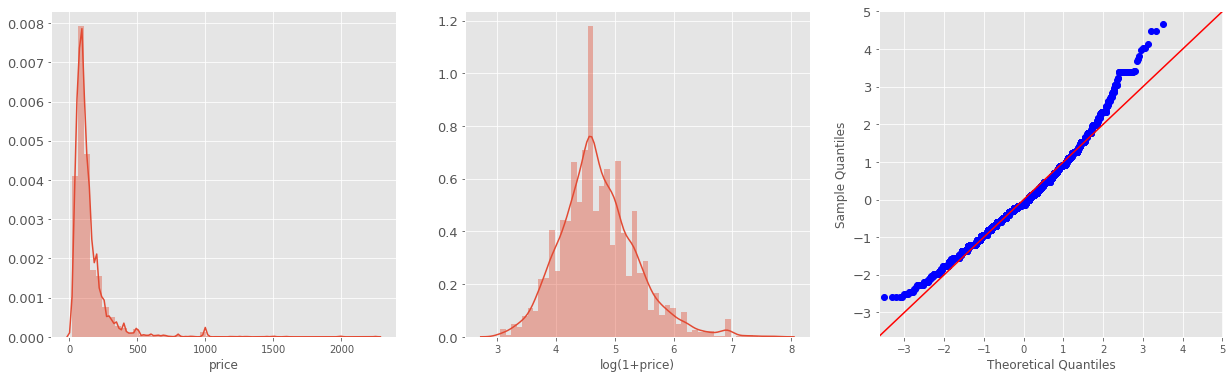

In [21]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(listings['price'], ax=axes[0])
sns.distplot(np.log1p(listings['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(listings['price']), stats.norm, fit=True, line='45', ax=axes[2]);

In [22]:
#listings['price'] = np.log1p(listings['price'])

#Finding a good host


At Airbnb you can get the status "Superhost"

From Airbnb:

As a Superhost, you’ll have more visibility, earning potential, and exclusive rewards. It's our way of saying thank you for your outstanding hospitality.
How to become a Superhost: Every 3 months, we check if you meet the following criteria. If you do, you'll earn or keep your Superhost status.
Superhosts have a 4.8 or higher average overall rating based on reviews from at least 50% of their Airbnb guests in the past year.
Superhosts have hosted at least 10 stays in the past year or, if they host longer-term reservations, 100 nights over at least 3 stays.
Superhosts have no cancellations in the past year, unless there were extenuating circumstances.
Superhosts respond to 90% of new messages within 24 hours.
Below, we can see that almost half portion of the listings in Denver do have a host who is Superhost

In [23]:
listings['host_is_superhost'] = listings['host_is_superhost'].replace({"t": "True", "f": "False"})


In [24]:
#Room Type
hostType=listings.groupby('host_is_superhost').id.count()
hostType=hostType.reset_index()
hostType=hostType.rename(columns={'id':'number_Of_Listings'})
hostType

,host_is_superhost,number_Of_Listings
0,False,2327
1,True,2143


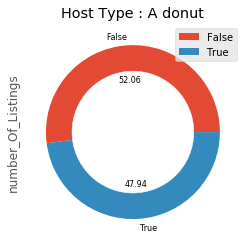

In [25]:
#Host Type
# Create a pieplot
hostType.plot.pie(y='number_Of_Listings',fontsize = 8, autopct = '%.2f',labels=(hostType['host_is_superhost']))
#plt.show()
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Host Type : A donut')


plt.show()


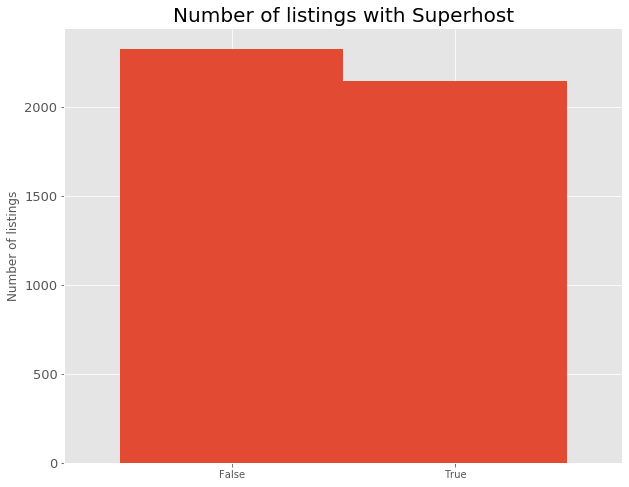

In [26]:
feq=listings['host_is_superhost'].value_counts()
feq.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Number of listings with Superhost", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.show()

In [27]:
hostType=listings.groupby('host_is_superhost')
hostType=hostType.number_of_reviews.mean()
#hostType.index.rename('True':'Super Host', 'False':'Normal Host'})#'Normal Host', 'Super Host'], inplace=True)
#hostType.reindex(['Normal Host', 'Super Host'])
hostType

host_is_superhost
False    25.511818
True     75.093327
Name: number_of_reviews, dtype: float64

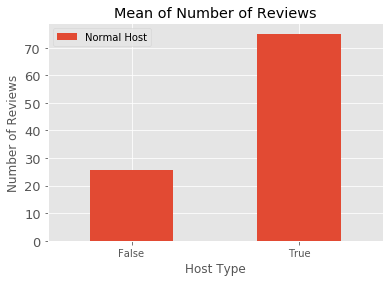

			0 --> Normal Host 	1 --> Super Host
Mean number of reviews: 25.51			75.0


In [28]:
ax = hostType.plot.bar(x='Host Type', y='Number of Reviews (Mean)', rot=0)
host=['Normal Host','Super Host']
#ax.legend(host)
plt.ylabel('Number of Reviews')
plt.xlabel('Host Type')
plt.title('Mean of Number of Reviews')
plt.legend(host)


plt.show()

print('\t\t\t0 --> Normal Host \t1 --> Super Host')
print('Mean number of reviews: {}\t\t\t{}'.format(round(hostType[0],2), round(hostType[1]),2))

Superhosts have more number of reviews. Shows how many people prefer superhosts while booking a listing.

In [29]:
hostType=listings.groupby('host_is_superhost')
hostType=hostType.review_scores_rating.mean()
#hostType.index.rename(['Normal Host', 'Super Host'], inplace=True)
#hostType.reindex(['Normal Host', 'Super Host'])

In [30]:
hostType.unique()

array([95.76793033, 98.10782443])

If I were to book accomomodation, I would not necessarily look for a superhost. Actually, I would be afraid that I would pay too much as superhost will likely increase their prices. However, I would also not want to host that responds badly, or cancels a lot.

As we can see, just over 52% of the 4509 listings have at least 10 reviews and respond to at least 90% of the new messages. I would consider those hosts "proven" good responders (which does not mean that a listing with less than 10 reviews cannot have good responding hosts; it is just not proven yet). Also, there are very few listings with hosts not replying to new messages within 24 hours.

In [31]:
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'].str.strip('%'))
listings10 = listings[listings['number_of_reviews']>=10]


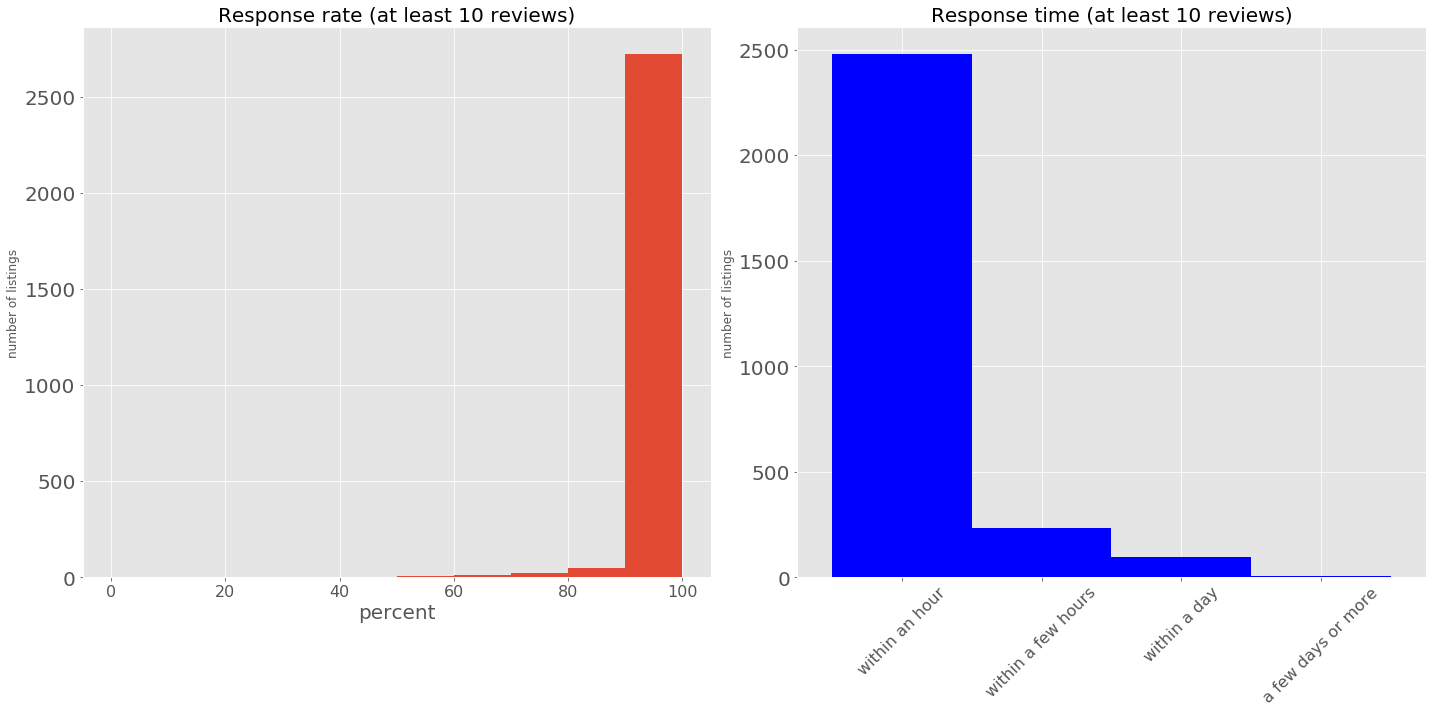

In [32]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq1 = listings10['host_response_rate'].dropna()
ax1= plt.hist(feq1)
plt.title("Response rate (at least 10 reviews)", fontsize=20)
plt.ylabel("number of listings")
plt.xlabel("percent", fontsize=20)

ax2 = fig.add_subplot(122)
feq2 = listings10['host_response_time'].value_counts()
ax2=feq2.plot.bar(color='b', width=1, rot=45)
plt.title("Response time (at least 10 reviews)", fontsize=20)
plt.ylabel("number of listings")

plt.tight_layout()
plt.show()

As we can see, the distribution is skewed and is a result of good hosts or presence of superhosts

In [33]:
#Neighborhood 
feq=listings['neighbourhood_cleansed'].value_counts().sort_values(ascending=True)


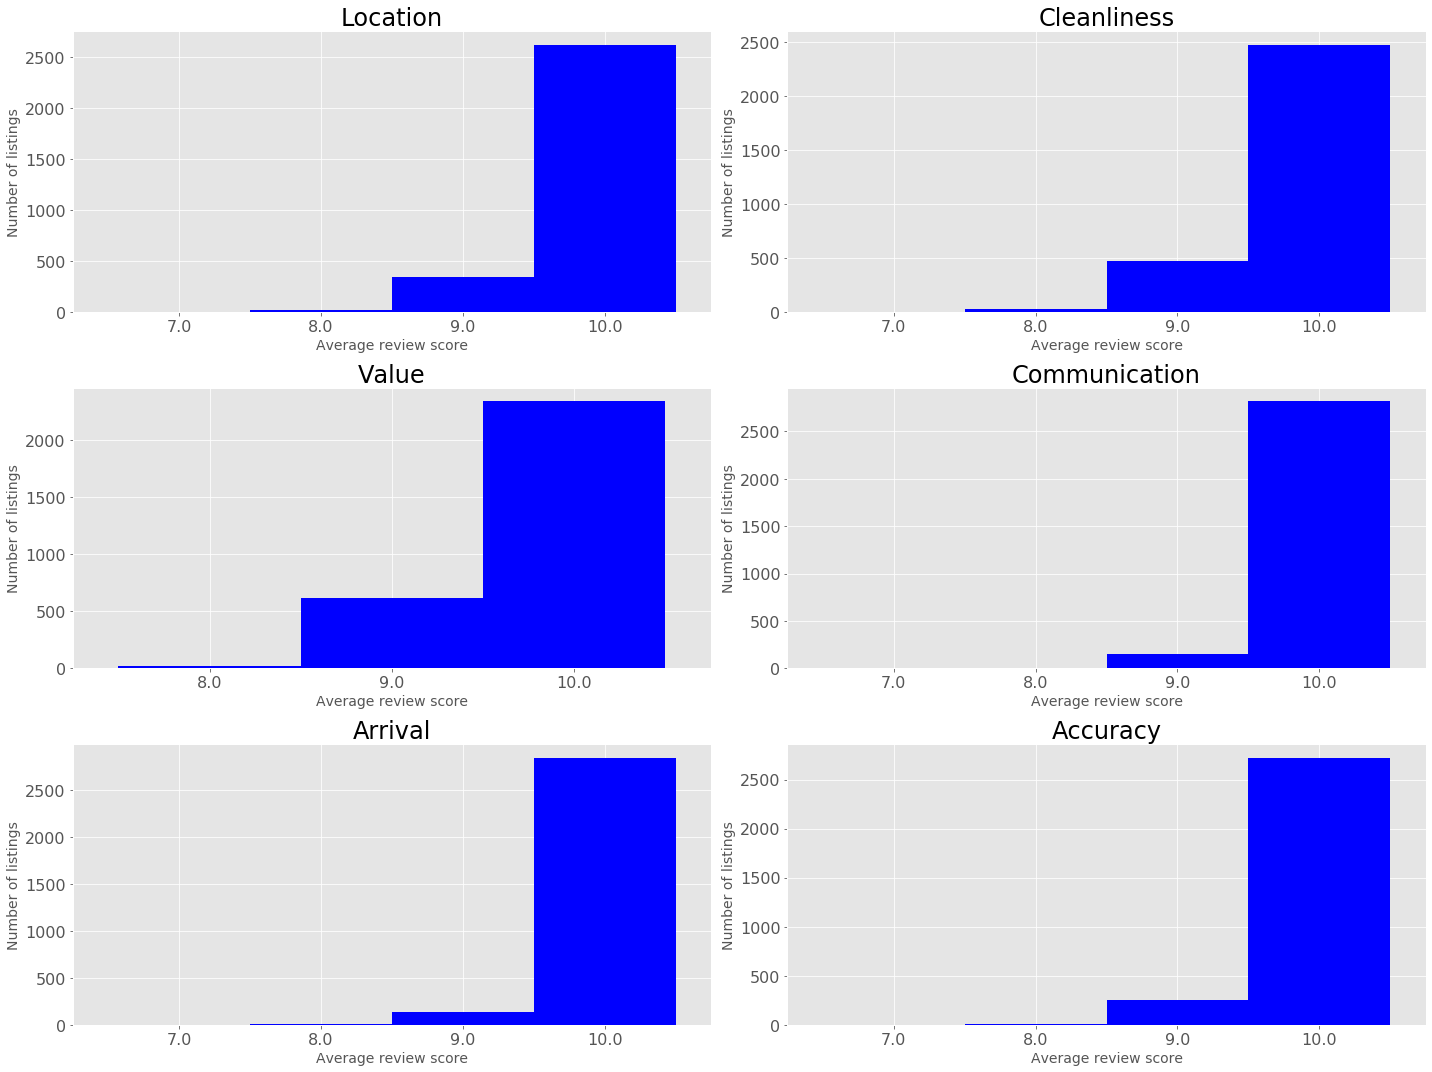

In [34]:
listings10 = listings[listings['number_of_reviews']>=10]

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq=listings10['review_scores_location'].value_counts().sort_index()
ax1=feq.plot.bar(color='b', width=1, rot=0)
#ax1.tick_params(axis = 'both', labelsize = 16)
plt.title("Location", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax2 = fig.add_subplot(322)
feq=listings10['review_scores_cleanliness'].value_counts().sort_index()
ax2=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Cleanliness", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax3 = fig.add_subplot(323)
feq=listings10['review_scores_value'].value_counts().sort_index()
ax3=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax4 = fig.add_subplot(324)
feq=listings10['review_scores_communication'].value_counts().sort_index()
ax4=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Communication", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax5 = fig.add_subplot(325)
feq=listings10['review_scores_checkin'].value_counts().sort_index()
ax5=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Arrival", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax6 = fig.add_subplot(326)
feq=listings10['review_scores_accuracy'].value_counts().sort_index()
ax6=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Accuracy", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()

Above plots show the scores for different attributes like communication, location, arrival, value, etc given by users. Most of the listings received very good feedback because of the services. Hence score does play a role for us to choose a listing or even determine the price

# Location Analysis

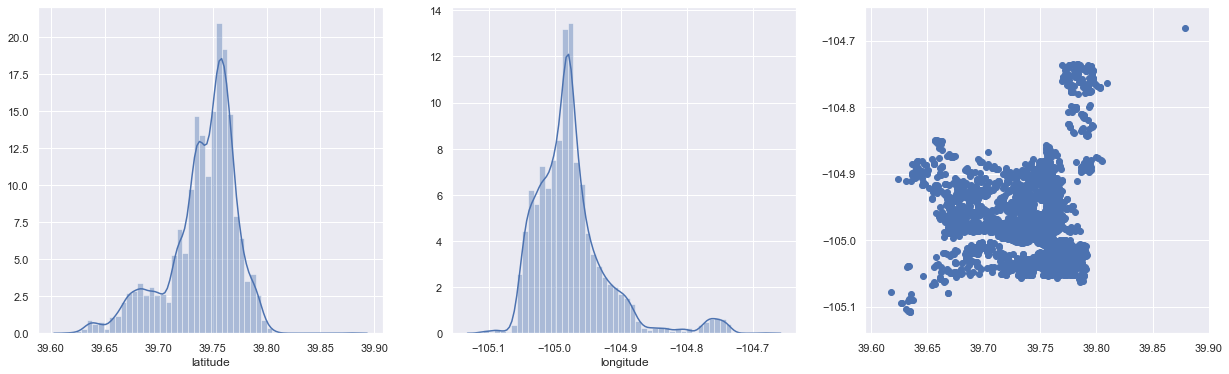

In [35]:
import seaborn as sns; sns.set()
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(listings['latitude'], ax=axes[0])
sns.distplot(listings['longitude'], ax=axes[1])
plt.scatter(x= listings['latitude'], y=listings['longitude'])
#sns.scatter(x= listings['latitude'], y=listings['longitude'])

Longitude and latitude are somewhat correlated with each other. This is because the locations of properties tend to come from clusters

In [36]:
from collections import Counter
nb_counts = Counter(listings.neighbourhood_cleansed)
nb_counts

Counter({'Highland': 299,
         'Five Points': 366,
         'North Park Hill': 64,
         'North Capitol Hill': 83,
         'Baker': 109,
         'Hale': 46,
         'West Highland': 146,
         'Capitol Hill': 205,
         'Overland': 22,
         'City Park': 42,
         'Washington Park': 29,
         'Union Station': 137,
         'South Park Hill': 44,
         'University Park': 27,
         'Washington Park West': 60,
         'Clayton': 71,
         'City Park West': 111,
         'Berkeley': 124,
         'Stapleton': 95,
         'Jefferson Park': 83,
         'Lowry Field': 12,
         'Platt Park': 72,
         'Sunnyside': 152,
         'Congress Park': 104,
         'Goldsmith': 13,
         'Sloan Lake': 116,
         'Barnum': 15,
         'Speer': 164,
         'CBD': 71,
         'Lincoln Park': 102,
         'Cole': 81,
         'Cheesman Park': 86,
         'University': 43,
         'Washington Virginia Vale': 39,
         'West Colfax': 128,
        

Text(0, 0.5, 'Count')

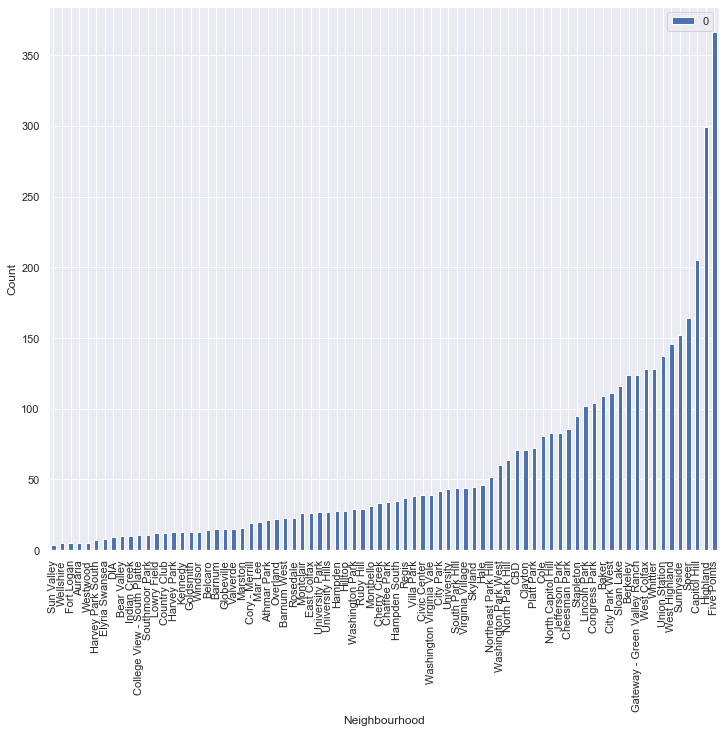

In [37]:


nb_counts = Counter(listings.neighbourhood_cleansed)
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
#tdf.set(xlabel='x axis', ylabel='y axis')
ax=tdf.plot(kind='bar',figsize=(12, 10), )
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Count')

Let's visualize listings on Google Maps using their Latitude and Longitude

import gmplot 
  
latitude_list = listings['latitude']
longitude_list = listings['longitude']
gmap = gmplot.GoogleMapPlotter(39.7392, -104.9903, 12)  #.from_geocode("Denver City") 

#gmap3 = gmplot.GoogleMapPlotter(30.3164945, 
#                                78.03219179999999, 13) 
  
# scatter method of map object  
# scatter points on the google map 
gmap.scatter( latitude_list, longitude_list, '#FF0000', 
                              size = 50, marker = False ) 
  
# Plot method Draw a line in 
# between given coordinates 
#gmap.plot(latitude_list, longitude_list)
        #   'cornflowerblue', edge_width = 0)
#var img = new google.maps.MarkerImage('6495ED.png')
#gmap.coloricon = "http://www.googlemapsmarkers.com/v1/%s/"
#gmap.marker(latitude_list, longitude_list,title="listings['price']")

gmap.draw('new.html')

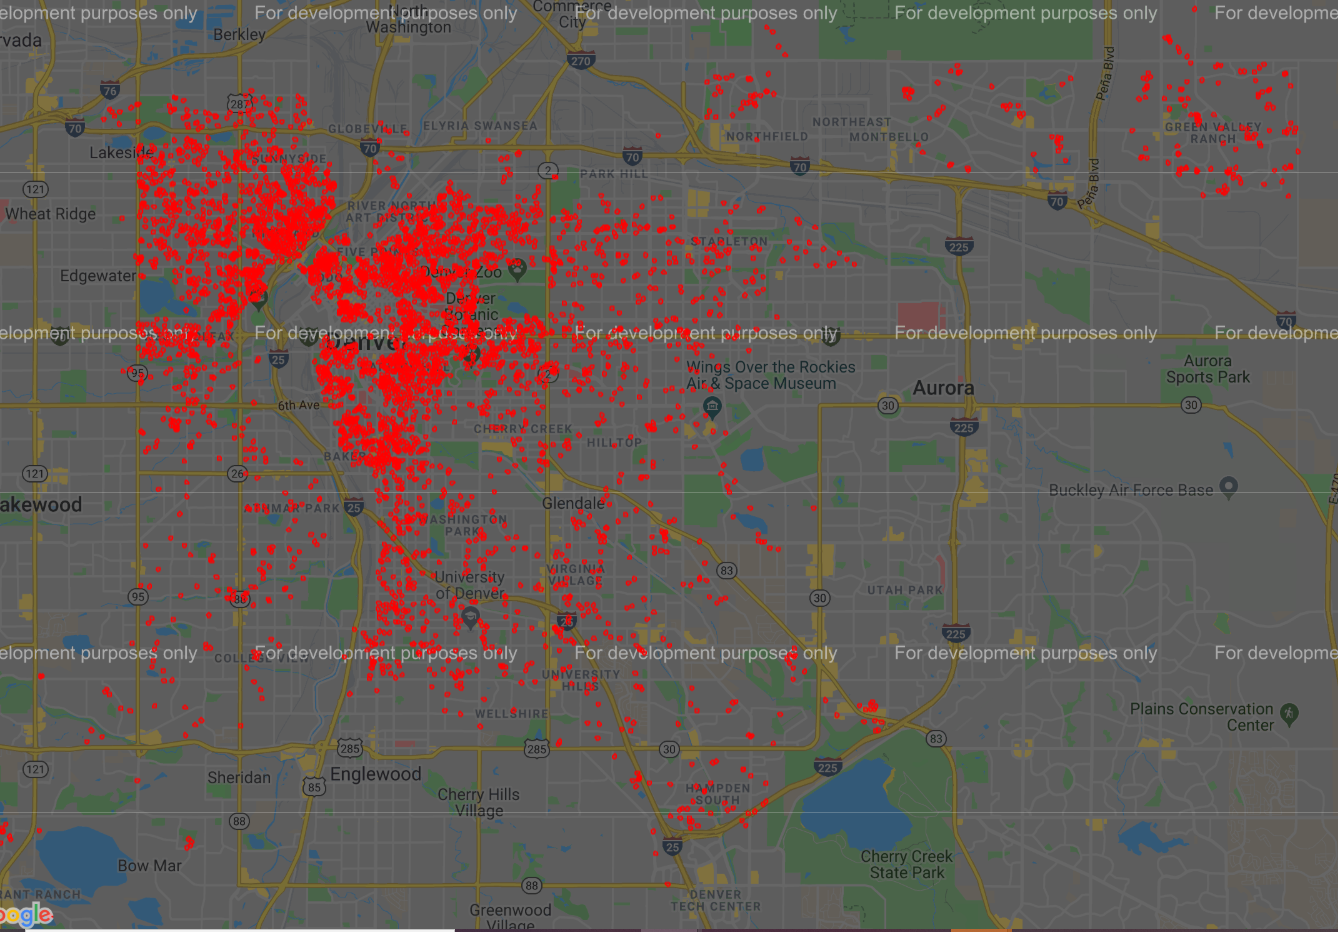

In [38]:
from IPython.display import Image
Image("C:\\Users\\gowri\\Desktop\\MachineLearning\\gmap.png")


As we can see, most of the listings are near the Downton area (Neighborhoods - Five Points, Highland, Speer, Capitol Hill, Sunnyside, West Highland and Union Station). 
* Above picture is a screenshot of the result from gmplot.

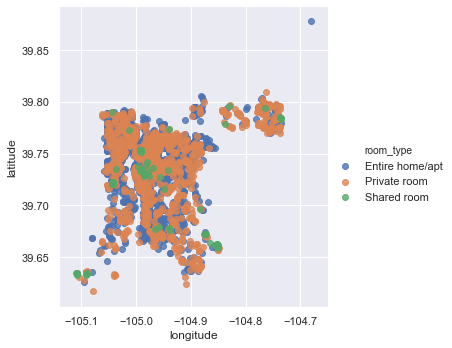

In [39]:
#sns.set(rc={'figure.figsize':(16,16)})
sns.lmplot(data=listings, x="longitude",y="latitude",fit_reg=False, hue='room_type', legend=True)
#plt.figure(figsize=(20,20))

#plt.title('Room type with respct to the locations')
plt.show()

Average daily price per neighbourhood
In order to compare "apples to apples" I have only selected the most common type of accommodation, 
which is accommodation for 2 persons. As expected, accommodation in the city centre is the most expensive. 

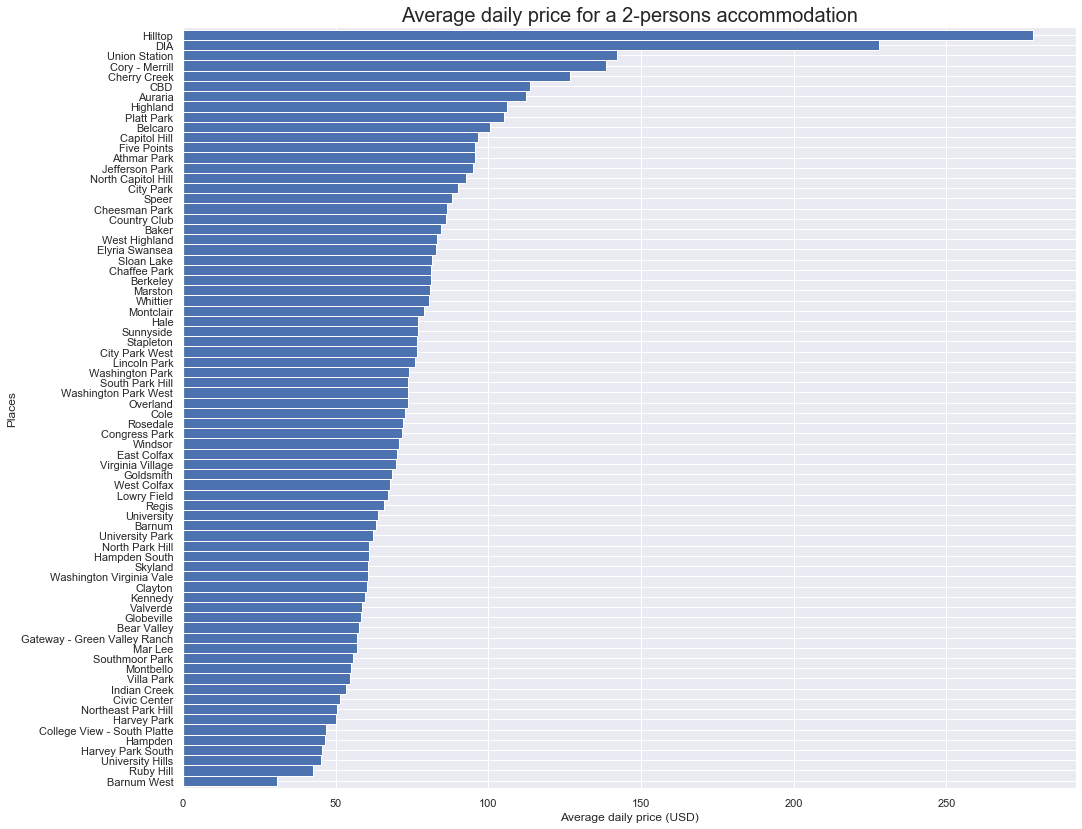

In [40]:
feq = listings[listings['accommodates']==2]
feq = feq.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(16, 14), color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (USD)', fontsize=12)
plt.ylabel("Places")
plt.show()

Text(0.5, 1.0, 'Distribution of Cancellation policies listed')

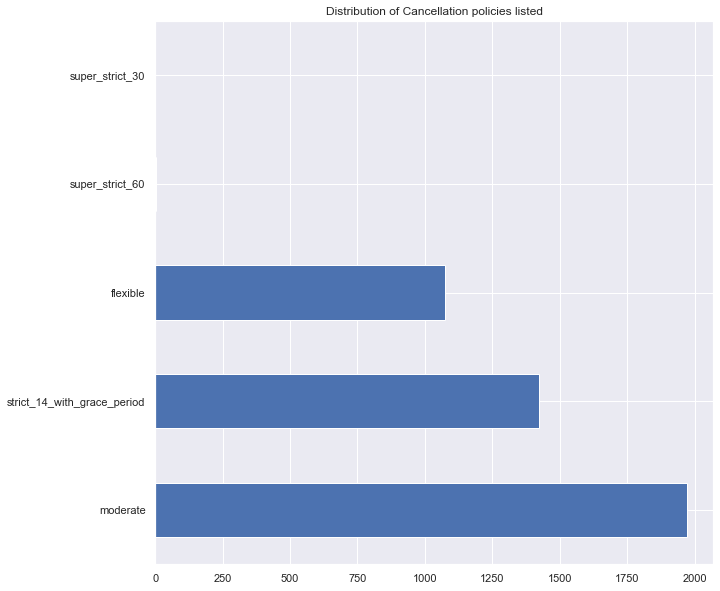

In [41]:
plt.figure(figsize=(10,10))
listings['cancellation_policy'].value_counts().plot(kind='barh')
plt.title('Distribution of Cancellation policies listed')

Moderate, Strict with 14 days grace and flexible policies dominate. This looks good for someone who is booking a listing in advance.

In [42]:
amenities=pd.read_csv('amenities.csv')
#amenities
#amenities_df=pd.DataFrame(amenities)
new_df=pd.DataFrame()
new_df=amenities
new_df=new_df.stack().reset_index()

In [43]:
amenities_final=new_df[0].value_counts()

Text(0.5, 1.0, 'Amenities and their distribution : A Countplot')

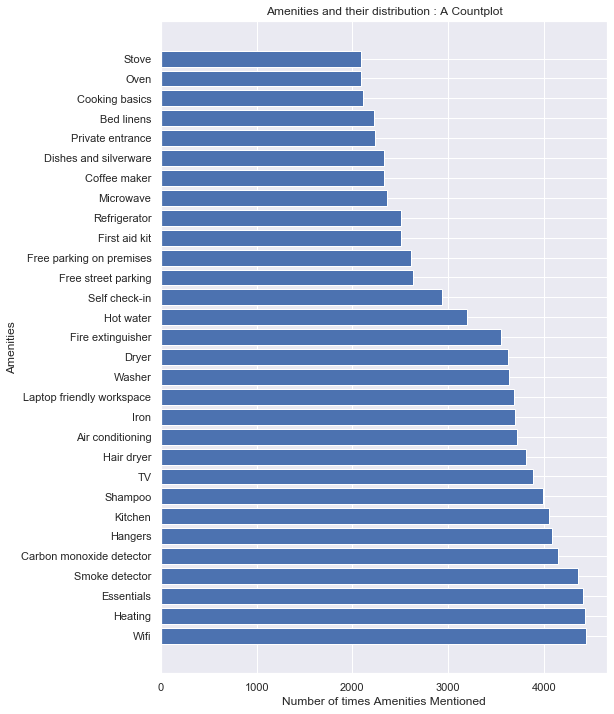

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,12))
plt.barh(amenities_final.index[:30], amenities_final[:30])
plt.xlabel('Number of times Amenities Mentioned')
plt.ylabel('Amenities')
plt.title('Amenities and their distribution : A Countplot')

In [45]:
print('Most common Amenity is {} with a count of {}'.format(amenities_final.index[0],amenities_final[:1][0]))

Most common Amenity is Wifi with a count of 4442


Amenities do play a role in pricing on Airbnb but more than the amenities, other features determine prices. I've tried to plot a distribution of amenities to show what are the common ameenities one can expect while booking a listing on Airbnb.

In [46]:
matrix_cols = ['accommodates', 'bedrooms', 'beds', 'minimum_nights', 'availability_365', 'number_of_reviews', 'price']

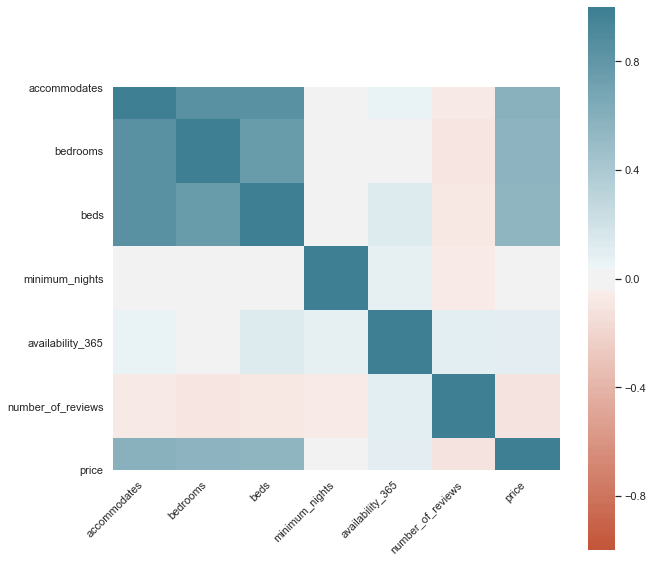

In [47]:
corr=listings[matrix_cols].corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Above plot is a correlation heatmap for numerical features. Some of them are little positively correlated - for example, Accomodates and beds have good correlation which makes sense. The more number of beds can accomodate more guests. Also, they are not highly correlated too - sometimes larger beds also results in more accomodation and hence we can say that type of the bed matters too. Similarly, t beds and bedrooms have a positive correlation. 
None of the features are highly or perfectly correlating with another feature and hence we won't face issues relating to high correlation.

In [48]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,360,https://www.airbnb.com/rooms/360,2.019060e+13,6/29/2019,LoHi Secret garden at the Chickadee Cottage,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,none,those who are interested in our local brews - ...,...,t,f,moderate,t,t,3,3,0,0,5.51
1,364,https://www.airbnb.com/rooms/364,2.019060e+13,6/29/2019,Lodo / RiNo LOFT via airport train,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",none,"Ten brewpubs within walking distance, two grea...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.71
2,590,https://www.airbnb.com/rooms/590,2.019060e+13,6/29/2019,Comfortable - and a great value!,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",none,I love the diversity of my neighborhood and it...,...,f,f,flexible,f,f,2,0,2,0,4.57
3,592,https://www.airbnb.com/rooms/592,2.019060e+13,6/29/2019,private,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,none,NaN,...,f,f,flexible,f,f,2,0,2,0,1.38
4,686,https://www.airbnb.com/rooms/686,2.019060e+13,6/29/2019,Alexandra's Uptown Queen Bed Room,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,none,"I love my Uptown neighborhood, which is within...",...,t,f,moderate,f,f,2,0,2,0,4.70


In [49]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4472 entries, 0 to 4510
Columns: 106 entries, id to reviews_per_month
dtypes: float64(29), int64(20), object(57)
memory usage: 3.7+ MB


In [50]:
listings.shape

(4472, 106)

In [51]:
listings.select_dtypes(include=["object"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4472 entries, 0 to 4510
Data columns (total 57 columns):
listing_url                         4472 non-null object
last_scraped                        4472 non-null object
name                                4472 non-null object
summary                             4402 non-null object
space                               3824 non-null object
description                         4439 non-null object
experiences_offered                 4472 non-null object
neighborhood_overview               3650 non-null object
notes                               2878 non-null object
transit                             3531 non-null object
access                              3420 non-null object
interaction                         3551 non-null object
house_rules                         3366 non-null object
picture_url                         4472 non-null object
host_url                            4472 non-null object
host_name                           44

We are dropping the following columns as they either have more than 50% missing values or are not relevant (free flowing text) for the price prediction-
1. listing_url
2. scrape_id
3. last_scraped
4. name
5. summary
6. Description
7. Neighborhood_Overview
8. Notes
9. Transit
10. Access
11. Interaction
12. House_Rules
13. Thumbnail
14. Medium_Url
15. Picture_Url
16. xl_picture_url
17. Host_id
18. host_url
19. host_name
20. host_since
21. host_location
22. host_about
23. host_thumbnail
24. host_picture_url
25. column `
26. host_verification
27. ``
28. host_identity_verified
29. street
30. neighborhood
31. neighborhood_group_cleansed
32. city
33. state
34. zipcode - 
35. market
36. smart_location
37. country_code
38. country
39. is_location_exact
40. square_feet
41. calendar_updated
42. calendar_last_scraped
43. first_review
44. last_review
45. requires_license
46. license
47. jurisdiction
48. instant_bookable
49. requires_guest_profile_picture
50. require_guest_phone_verification
51. space
52. neighborhood_overview
53. host_acceptance_rate
54. minimum_minimum_nights
55. maximum_minimum_nights
56. maximum_maximum_nights
57. maximum_nights_avg_ntm
58. availability_30
59. is_business_travel_ready
60. calculated_host_listings_count
61. calculated_host_listings_count_entire_homes
62. calculated_host_listings_count_private_rooms
63. calculated_host_listings_count_shared_rooms
64. Cleaning fees - This feature is just an extra fees and will not determine the actual price of a listing and hence we are dropping it
65. security deposit - Same as cleaning fees. Collection of security deposit solely depends on the host
66.


In [52]:
listings=listings[['id','experiences_offered','longitude','latitude','cancellation_policy','neighbourhood_cleansed','host_response_time',
                   'host_response_rate','host_is_superhost','host_listings_count','review_scores_rating','property_type','room_type',
                   'accommodates','bathrooms','bedrooms','beds','reviews_per_month', 'has_availability','amenities','number_of_reviews',
                   'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','square_feet','weekly_price','monthly_price',
                   'guests_included', 'extra_people', 'bed_type','review_scores_location','review_scores_value',
                   'minimum_nights','maximum_nights','availability_365','price']]

Trimming Neighborhood Entries
When we explored our data we saw that geography was very important to pricing, especially on Five Points. The neighbourhood_cleansed feature could therefore be important. Looking at the distribution below we notice it is heavily left-skewed.

In [53]:
def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array

In [54]:
listings.head()

,id,experiences_offered,longitude,latitude,cancellation_policy,neighbourhood_cleansed,host_response_time,host_response_rate,host_is_superhost,host_listings_count,...,monthly_price,guests_included,extra_people,bed_type,review_scores_location,review_scores_value,minimum_nights,maximum_nights,availability_365,price
0,360,none,-105.00256,39.76703,moderate,Highland,within an hour,97.0,True,3.0,...,NaN,2,15.0,Futon,10.0,10.0,1,29,305,140.0
1,364,none,-104.97902,39.76551,strict_14_with_grace_period,Five Points,NaN,NaN,False,1.0,...,NaN,1,0.0,Real Bed,9.0,9.0,185,190,240,179.0
2,590,none,-104.91237,39.75361,flexible,North Park Hill,within an hour,100.0,True,2.0,...,"$1,275.00",1,5.0,Real Bed,10.0,10.0,1,300,121,61.0
3,592,none,-104.91156,39.75438,flexible,North Park Hill,within an hour,100.0,True,2.0,...,$975.00,1,5.0,Real Bed,10.0,10.0,30,365,142,42.0
4,686,none,-104.97756,39.74503,moderate,North Capitol Hill,within an hour,100.0,False,2.0,...,"$1,470.00",1,0.0,Real Bed,10.0,9.0,2,180,0,70.0


In [55]:

#listings['review_scores_rating'] = listings['review_scores_rating'].apply(lambda grp: grp.fillna(grp.median()))
mean_rating = listings['review_scores_rating'].mean()
listings['review_scores_rating'].fillna(mean_rating, inplace=True)

mean_response=listings['host_response_rate'].mean()
listings['host_response_rate'].fillna(mean_response, inplace=True)

mode_host_response_time=listings['host_response_time'].mode()
listings['host_response_time'].fillna(mode_host_response_time, inplace=True)



mode_host_listings_count=listings['host_listings_count'].mode()
listings['host_listings_count']=listings['host_listings_count'].fillna(mode_host_listings_count)

mean_bed=listings['beds'].mean()
listings['beds'].fillna(mean_bed, inplace=True)

mean_bedrooms=listings['bedrooms'].mean()
listings['bedrooms'].fillna(mean_bedrooms, inplace=True)


mean_review_scores_accuracy=listings['review_scores_accuracy'].mean()
listings['review_scores_accuracy'].fillna(mean_review_scores_accuracy, inplace=True)

mean_review_scores_cleanliness=listings['review_scores_cleanliness'].mean()
listings['review_scores_cleanliness'].fillna(mean_review_scores_cleanliness, inplace=True)

mean_review_scores_checkin=listings['review_scores_checkin'].mean()
listings['review_scores_checkin'].fillna(mean_review_scores_checkin, inplace=True)

mean_review_scores_location=listings['review_scores_location'].mean()
listings['review_scores_location'].fillna(mean_review_scores_location, inplace=True)

mean_review_scores_value=listings['review_scores_value'].mean()
listings['review_scores_value'].fillna(mean_review_scores_value, inplace=True)

# Preprocessing 


In [56]:
listings.shape

(4472, 36)

In [57]:
listings.head()

,id,experiences_offered,longitude,latitude,cancellation_policy,neighbourhood_cleansed,host_response_time,host_response_rate,host_is_superhost,host_listings_count,...,monthly_price,guests_included,extra_people,bed_type,review_scores_location,review_scores_value,minimum_nights,maximum_nights,availability_365,price
0,360,none,-105.00256,39.76703,moderate,Highland,within an hour,97.000000,True,3.0,...,NaN,2,15.0,Futon,10.0,10.0,1,29,305,140.0
1,364,none,-104.97902,39.76551,strict_14_with_grace_period,Five Points,NaN,97.618108,False,1.0,...,NaN,1,0.0,Real Bed,9.0,9.0,185,190,240,179.0
2,590,none,-104.91237,39.75361,flexible,North Park Hill,within an hour,100.000000,True,2.0,...,"$1,275.00",1,5.0,Real Bed,10.0,10.0,1,300,121,61.0
3,592,none,-104.91156,39.75438,flexible,North Park Hill,within an hour,100.000000,True,2.0,...,$975.00,1,5.0,Real Bed,10.0,10.0,30,365,142,42.0
4,686,none,-104.97756,39.74503,moderate,North Capitol Hill,within an hour,100.000000,False,2.0,...,"$1,470.00",1,0.0,Real Bed,10.0,9.0,2,180,0,70.0


In [58]:
listings['host_is_superhost'].fillna(listings['host_is_superhost'].mode()[0], inplace=True)


In [59]:
listings['bathrooms']=listings['bathrooms'].fillna(0).astype(int)
listings['bathrooms']=listings['bathrooms'].replace(0,listings['bathrooms'].mode())

In [60]:
listings['host_listings_count']=listings['host_listings_count'].fillna(0).astype(int)
listings['host_listings_count']=listings['host_listings_count'].replace(0,listings['host_listings_count'].mode())

In [61]:
listings.drop(columns=['square_feet', 'monthly_price', 'weekly_price', 'experiences_offered', 'amenities'], inplace=True)

In [62]:
listings.shape

(4472, 31)

In [63]:
listings['host_response_time']=listings['host_response_time'].fillna(listings['host_response_time'].mode()[0])

In [64]:
listings['host_response_time']

0       within an hour
1       within an hour
2       within an hour
3       within an hour
4       within an hour
             ...      
4506    within an hour
4507    within an hour
4508    within an hour
4509    within an hour
4510    within an hour
Name: host_response_time, Length: 4472, dtype: object

In [65]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4472 entries, 0 to 4510
Data columns (total 31 columns):
id                           4472 non-null int64
longitude                    4472 non-null float64
latitude                     4472 non-null float64
cancellation_policy          4472 non-null object
neighbourhood_cleansed       4472 non-null object
host_response_time           4472 non-null object
host_response_rate           4472 non-null float64
host_is_superhost            4472 non-null object
host_listings_count          4472 non-null int32
review_scores_rating         4472 non-null float64
property_type                4472 non-null object
room_type                    4472 non-null object
accommodates                 4472 non-null int64
bathrooms                    4472 non-null int32
bedrooms                     4472 non-null float64
beds                         4472 non-null float64
reviews_per_month            4472 non-null float64
has_availability             4472 non-nu

In [66]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

listings['cancellation_policy'] = labelencoder.fit_transform(listings['cancellation_policy'])
listings['host_response_time'] = labelencoder.fit_transform(listings['host_response_time'])
listings['property_type'] = labelencoder.fit_transform(listings['property_type'])
listings['room_type'] = labelencoder.fit_transform(listings['room_type'])
listings['bed_type'] = labelencoder.fit_transform(listings['bed_type'])
listings['neighbourhood_cleansed'] = labelencoder.fit_transform(listings['neighbourhood_cleansed'])

listings['host_is_superhost'] = listings['host_is_superhost'].replace({"True": 1, "False": 0})
listings['has_availability'] = listings['has_availability'].replace({"t": 1, "f": 0})




In [67]:
listings.head()

,id,longitude,latitude,cancellation_policy,neighbourhood_cleansed,host_response_time,host_response_rate,host_is_superhost,host_listings_count,review_scores_rating,...,review_scores_checkin,guests_included,extra_people,bed_type,review_scores_location,review_scores_value,minimum_nights,maximum_nights,availability_365,price
0,360,-105.00256,39.76703,1,35,3,97.000000,1,3,100.0,...,10.0,2,15.0,2,10.0,10.0,1,29,305,140.0
1,364,-104.97902,39.76551,2,25,3,97.618108,0,1,97.0,...,10.0,1,0.0,4,9.0,9.0,185,190,240,179.0
2,590,-104.91237,39.75361,0,47,3,100.000000,1,2,97.0,...,10.0,1,5.0,4,10.0,10.0,1,300,121,61.0
3,592,-104.91156,39.75438,0,47,3,100.000000,1,2,98.0,...,10.0,1,5.0,4,10.0,10.0,30,365,142,42.0
4,686,-104.97756,39.74503,1,46,3,100.000000,0,2,98.0,...,10.0,1,0.0,4,10.0,9.0,2,180,0,70.0


In [68]:


def single_pt_haversine(lat2, lon2, degrees=True):

    R = 6372.8  # Earth radius in kilometers
 #Lat, Long = 39.7452, -104.9922 is the exact location of Denver Downtown where I'm supposed to visit on all the days of my stay
#Hence let us calculate the haversine distance to this location from all the listings
    dLat = radians(lat2 - 39.7452)
    dLon = radians(lon2 - -104.9922)
    lat1 = radians(39.7452)
    lat2 = radians(lat2)
 
    a = sin(dLat / 2)**2 + cos(lat1) * cos(lat2) * sin(dLon / 2)**2
    c = 2 * asin(sqrt(a))
 
    return R * c


In [69]:
#To drop ltitude and longitude, I have used haversine distance to find the actual geographic distance from 
#location of listing from Denver Downtown
listings['harvesine_distance']=[single_pt_haversine(x, y) for x, y in zip(listings.latitude, listings.longitude)]

In [70]:
listings=listings.drop(columns=['longitude','latitude'])

In [71]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4472 entries, 0 to 4510
Data columns (total 30 columns):
id                           4472 non-null int64
cancellation_policy          4472 non-null int32
neighbourhood_cleansed       4472 non-null int32
host_response_time           4472 non-null int32
host_response_rate           4472 non-null float64
host_is_superhost            4472 non-null int64
host_listings_count          4472 non-null int32
review_scores_rating         4472 non-null float64
property_type                4472 non-null int32
room_type                    4472 non-null int32
accommodates                 4472 non-null int64
bathrooms                    4472 non-null int32
bedrooms                     4472 non-null float64
beds                         4472 non-null float64
reviews_per_month            4472 non-null float64
has_availability             4472 non-null object
number_of_reviews            4472 non-null int64
review_scores_accuracy       4472 non-null float6

In [72]:
listings_duplicate=listings

In [73]:
#Cancellation Policy
listings_cancellation=pd.get_dummies(listings['cancellation_policy'], columns='cancellation_policy', 
                                     prefix='cancellation_policy', drop_first=True)
listings=pd.concat([listings, listings_cancellation], axis=1)
listings.drop(['cancellation_policy'],axis=1,inplace= True)

#Host Response time
listings_response_time=pd.get_dummies(listings['host_response_time'], columns='host_response_time', 
                                      prefix='host_response_time', drop_first=True)
listings=pd.concat([listings, listings_response_time], axis=1)
listings.drop(['host_response_time'],axis=1,inplace= True)

#Property Type
listings_response_time=pd.get_dummies(listings['property_type'], columns='property_type', prefix='property_type', drop_first=True)
listings=pd.concat([listings, listings_response_time], axis=1)
listings.drop(['property_type'],axis=1,inplace= True)

#Room Type
listings_response_time=pd.get_dummies(listings['room_type'], columns='room_type', prefix='room_type', drop_first=True)
listings=pd.concat([listings, listings_response_time], axis=1)
listings.drop(['room_type'],axis=1,inplace= True)

#Bed Type
listings_response_time=pd.get_dummies(listings['bed_type'], columns='bed_type', prefix='bed_type', drop_first=True)
listings=pd.concat([listings, listings_response_time], axis=1)
listings.drop(['bed_type'],axis=1,inplace= True)



In [74]:
#Neighborhood
#Bed Type
listings_neighbourhood_cleansed=pd.get_dummies(listings['neighbourhood_cleansed'], columns='neighbourhood_cleansed',
                                               prefix='neighbourhood_cleansed', drop_first=True)
listings=pd.concat([listings, listings_neighbourhood_cleansed], axis=1)
listings.drop(['neighbourhood_cleansed'],axis=1,inplace= True)


In [75]:
listings.shape

(4472, 132)

In [76]:
listings.head()

,id,host_response_rate,host_is_superhost,host_listings_count,review_scores_rating,accommodates,bathrooms,bedrooms,beds,reviews_per_month,...,neighbourhood_cleansed_68,neighbourhood_cleansed_69,neighbourhood_cleansed_70,neighbourhood_cleansed_71,neighbourhood_cleansed_72,neighbourhood_cleansed_73,neighbourhood_cleansed_74,neighbourhood_cleansed_75,neighbourhood_cleansed_76,neighbourhood_cleansed_77
0,360,97.000000,1,3,100.0,5,1,2.0,2.0,5.51,...,0,0,0,0,0,0,0,0,0,0
1,364,97.618108,0,1,97.0,3,1,1.0,1.0,0.71,...,0,0,0,0,0,0,0,0,0,0
2,590,100.000000,1,2,97.0,3,1,1.0,1.0,4.57,...,0,0,0,0,0,0,0,0,0,0
3,592,100.000000,1,2,98.0,2,1,1.0,1.0,1.38,...,0,0,0,0,0,0,0,0,0,0
4,686,100.000000,0,2,98.0,2,2,1.0,1.0,4.70,...,0,0,0,0,0,0,0,0,0,0


In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
listings.reset_index()
X = listings.loc[:, listings.columns!='price']  #independent columns
y =listings['price']    #target column i.e price range

In [78]:
X.shape

(4472, 131)

In [79]:
print('Number of samples:', X.shape[0])
print('Number of features:', X.shape[1])

Number of samples: 4472
Number of features: 131


In [80]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling



mnmx_X = MinMaxScaler()
X_train = mnmx_X.fit_transform(X_train)
X_test= mnmx_X.transform(X_test)
mnmx_y = MinMaxScaler()
y_train = mnmx_y.fit_transform(y_train.reshape(-1, 1))

In [ ]:
#Start Project 2

In [ ]:
#Bagging and Pasting - Kneighbor and Linear regression

Bagging Model 1 - Decision Tree Regressor

In [87]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_rgr = DecisionTreeRegressor(random_state=0)
bag_rgr = BaggingRegressor(dt_rgr, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)

bag_rgr.fit(X_train, y_train)
y_pred = bag_rgr.predict(X_test)

In [88]:
from sklearn.metrics import r2_score
dtr_train_r2=r2_score(y_train, bag_rgr.predict(X_train))
dtr_train_mae=median_absolute_error(y_train, bag_rgr.predict(X_train))
print("R^2 score on training set = ",str(round(dtr_train_r2,3)))
print('The median absolute error on our training data is: ' + str(round(dtr_train_mae, 3)))

dtr_test_mae=median_absolute_error(y_test, y_pred)
dtr_test_r2=r2_score(y_test,y_pred)
print("R^2 score on test set = ",str(round(r2_score(y_test,y_pred),3)))
print('The median absolute error on our testing data is: ' + str(round(dtr_test_mae, 3)))


R^2 score on training set =  0.451
The median absolute error on our training data is: 26.486
R^2 score on test set =  0.452
The median absolute error on our testing data is: 0.452


In [ ]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()


 Bagging Model 2 - Random Forest Regressor -

In [89]:
from sklearn.ensemble import RandomForestRegressor

rnd_rgr = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, bootstrap=True)
rnd_rgr.fit(X_train, y_train)

y_pred_rf = rnd_rgr.predict(X_test)


In [90]:
from sklearn.metrics import r2_score
rnd_train_r2=r2_score(y_train, rnd_rgr.predict(X_train))
rnd_train_mae=median_absolute_error(y_train, rnd_rgr.predict(X_train))
print("R^2 score on training set = ",str(round(rnd_train_r2,3)))
print('The median absolute error on our training data is: ' + str(round(rnd_train_mae, 3)))


R^2 score on training set =  0.606
The median absolute error on our training data is: 30.956


In [91]:
rnd_test_mae=median_absolute_error(y_test, y_pred_rf)
rnd_test_r2=r2_score(y_test,y_pred_rf)
print("R^2 score on test set = ",str(round(r2_score(y_test,y_pred_rf),3)))
print('The median absolute error on our testing data is: ' + str(round(rnd_test_mae, 3)))

R^2 score on test set =  0.509
The median absolute error on our testing data is: 31.329


In [ ]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_rf, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()


In [139]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Bagging Model","Train MAE","Test MAE"]
x.add_row(["Decision Tree Regressor ",26.486, 0.000 ]) 
x.add_row(["Random Forest Regressor ", 30.956, 31.329 ]) 
print(x) 


+--------------------------+-----------+----------+
|      Bagging Model       | Train MAE | Test MAE |
+--------------------------+-----------+----------+
| Decision Tree Regressor  |   26.486  |   0.0    |
| Random Forest Regressor  |   30.956  |  31.329  |
+--------------------------+-----------+----------+


Pasting Algorithms

In [ ]:
#Method 1 - Kneighbors 

In [92]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_rgr = DecisionTreeRegressor(random_state=0)
bag_rgr = BaggingRegressor(dt_rgr, n_estimators=500, max_samples=100, bootstrap=False)

bag_rgr.fit(X_train, y_train)
y_pred = bag_rgr.predict(X_test)

In [93]:
from sklearn.metrics import r2_score
dtr_train_r2=r2_score(y_train, bag_rgr.predict(X_train))
dtr_train_mae=median_absolute_error(y_train, bag_rgr.predict(X_train))
print("R^2 score on training set = ",str(round(dtr_train_r2,3)))
print('The median absolute error on our training data is: ' + str(round(dtr_train_mae, 3)))

rnd_test_mae=median_absolute_error(y_test, y_pred)
rnd_test_r2=r2_score(y_test,y_pred)
print("R^2 score on test set = ",str(round(r2_score(y_test,y_pred),3)))
print('The median absolute error on our testing data is: ' + str(round(rnd_test_mae, 3)))

R^2 score on training set =  0.453
The median absolute error on our training data is: 26.279
R^2 score on test set =  0.455
The median absolute error on our testing data is: 28.076


In [ ]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()


In [ ]:
# Method 2 -Random Forest Regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor

rnd_rgr = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, bootstrap=False)
rnd_rgr.fit(X_train, y_train)

y_pred_rf = rnd_rgr.predict(X_test)


In [95]:
from sklearn.metrics import r2_score
rnd_train_r2=r2_score(y_train, rnd_rgr.predict(X_train))
rnd_train_mae=median_absolute_error(y_train, rnd_rgr.predict(X_train))
print("R^2 score on training set = ",str(round(rnd_train_r2,3)))
print('The median absolute error on our training data is: ' + str(round(rnd_train_mae, 3)))

rnd_test_mae=median_absolute_error(y_test, y_pred_rf)
rnd_test_r2=r2_score(y_test,y_pred_rf)
print("R^2 score on test set = ",str(round(r2_score(y_test,y_pred_rf),3)))
print('The median absolute error on our testing data is: ' + str(round(rnd_test_mae, 3)))

R^2 score on training set =  0.506
The median absolute error on our training data is: 33.0
R^2 score on test set =  0.316
The median absolute error on our testing data is: 34.451


In [ ]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()


In [140]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Pasting Model","Train MAE","Test MAE"]
x.add_row(["Decision Tree Regressor ",26.279, 28.076 ]) 
x.add_row(["Random Forest Regressor ", 33.0, 34.451 ]) 
print(x) 

+--------------------------+-----------+----------+
|      Pasting Model       | Train MAE | Test MAE |
+--------------------------+-----------+----------+
| Decision Tree Regressor  |   26.279  |  28.076  |
| Random Forest Regressor  |    33.0   |  34.451  |
+--------------------------+-----------+----------+


 Adaboosting 

In [96]:
# Adaboost with Decison Tree

from sklearn.ensemble import AdaBoostRegressor
ada_rgr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1), n_estimators=200, learning_rate=0.5, random_state=0)
ada_rgr.fit(X_train, y_train)

y_pred_ada = ada_rgr.predict(X_test)

In [97]:
from sklearn.metrics import r2_score
ada_train_r2=r2_score(y_train, ada_rgr.predict(X_train))
ada_train_mae=median_absolute_error(y_train, ada_rgr.predict(X_train))
print("R^2 score on training set = ",str(round(ada_train_r2,3)))
print('The median absolute error on our training data is: ' + str(round(ada_train_mae, 3)))

ada_test_mae=median_absolute_error(y_test, y_pred_ada)
ada_test_r2=r2_score(y_test,y_pred_ada)
print("R^2 score on test set = ",str(round(r2_score(y_test,y_pred_ada),3)))
print('The median absolute error on our testing data is: ' + str(round(ada_test_mae, 3)))

R^2 score on training set =  -0.467
The median absolute error on our training data is: 151.062
R^2 score on test set =  -0.506
The median absolute error on our testing data is: 149.062


In [ ]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_ada, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()


In [98]:
#Adaboost with Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression(fit_intercept=True)

In [99]:
ada_rgr = AdaBoostRegressor(lin_reg, n_estimators=200, learning_rate=0.5, random_state=0)
ada_rgr.fit(X_train, y_train)

y_pred_ada = ada_rgr.predict(X_test)

In [100]:
from sklearn.metrics import r2_score
ada_train_r2=r2_score(y_train, ada_rgr.predict(X_train))
ada_train_mae=median_absolute_error(y_train, ada_rgr.predict(X_train))
print("R^2 score on training set = ",str(round(ada_train_r2,3)))
print('The median absolute error on our training data is: ' + str(round(ada_train_mae, 3)))

ada_test_mae=median_absolute_error(y_test, y_pred_ada)
ada_test_r2=r2_score(y_test,y_pred_ada)
print("R^2 score on test set = ",str(round(r2_score(y_test,y_pred_ada),3)))
print('The median absolute error on our testing data is: ' + str(round(ada_test_mae, 3)))

R^2 score on training set =  -0.409
The median absolute error on our training data is: 86.845
R^2 score on test set =  -0.861
The median absolute error on our testing data is: 90.612


In [ ]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()


In [141]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Adaboost Model","Train MAE","Test MAE"]
x.add_row(["Decision Tree Regressor ",151.062, 149.062 ]) 
x.add_row(["Linear Regressor ", 86.845, 90.612 ]) 
print(x) 

+--------------------------+-----------+----------+
|      Adaboost Model      | Train MAE | Test MAE |
+--------------------------+-----------+----------+
| Decision Tree Regressor  |  151.062  | 149.062  |
|    Linear Regressor      |   86.845  |  90.612  |
+--------------------------+-----------+----------+


Gradient Boosting

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
    
    
#Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [102]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train, y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R2 sq: ',model_score)
y_predicted = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

R2 sq:  0.7704060240896211
Mean squared error: 7963.11
Test Variance score: 0.59


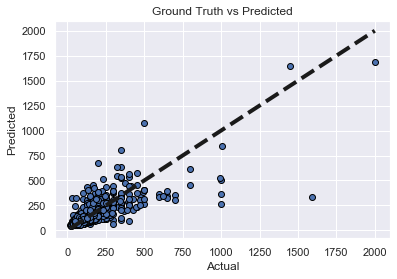

In [103]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()


Principal Component Analysis

In [104]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [111]:
pca = PCA(n_components=5) # d = 5 in our case 
X_reduced = pca.fit_transform(X_train)

In [112]:
pca.n_components_

5

In [113]:
np.sum(pca.explained_variance_ratio_)

0.999999999986508

In [114]:
X_train.shape

(3354, 131)

In [115]:
pca.explained_variance_ratio_

array([9.99999997e-01, 3.22113320e-09, 1.60596455e-10, 4.44152255e-11,
       2.73087422e-11])

If you observe the above explained variance , the first component itself would have most of the variance and hence we get d=1

In [116]:
pca = PCA(n_components = 5)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

Linear Regression with PCA 

In [117]:
reg=LinearRegression()
reg.fit(X_train_reduced,y_train)
y_pred=reg.predict(X_test_reduced)

In [118]:
from sklearn.metrics import r2_score
train_r2=r2_score(y_train, reg.predict(X_train_reduced))
train_mae=median_absolute_error(y_train, reg.predict(X_train_reduced))
print("R^2 score on training set = ",str(round(train_r2,3)))
print('The median absolute error on our training data is: ' + str(round(train_mae, 3)))

test_mae=median_absolute_error(y_test, y_pred)
test_r2=r2_score(y_test,y_pred)
print("R^2 score on test set = ",str(round(r2_score(y_test,y_pred),3)))
print('The median absolute error on our testing data is: ' + str(round(test_mae, 3)))

R^2 score on training set =  0.048
The median absolute error on our training data is: 55.932
R^2 score on test set =  0.069
The median absolute error on our testing data is: 51.162


LinearSVC for normal X_train and Y_train


In [119]:
from tqdm import tqdm
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn import model_selection


regressor=LinearSVR()
regressor.fit(X_train, y_train)


C:\Users\gowri\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [120]:
y_pred=regressor.predict(X_test)

In [121]:
y_train_pred = regressor.predict(X_train)

In [122]:
from sklearn.metrics import r2_score
print('MAE for training set - ',format(median_absolute_error(y_train, y_train_pred)))
print('MAE for testing set - ',format(median_absolute_error(y_test, y_pred)))
print('R2 score - ', format(r2_score(y_test, y_pred)))

MAE for testing set -  319.78879760986547
MAE for testing set -  318.91501028835665
R2 score -  -7.139869253672138


PCA - LinearSVC for reduced X_train and Xtest

In [123]:

regressor=LinearSVR()
regressor.fit(X_train_reduced, y_train)
y_pred=regressor.predict(X_test_reduced)
y_train_pred = regressor.predict(X_train_reduced)
print('MAE for training set - ',format(median_absolute_error(y_train, y_train_pred)))
print('MAE for testing set - ',format(median_absolute_error(y_test, y_pred)))
print('R2 score - ', format(r2_score(y_test, y_pred)))

C:\Users\gowri\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


MAE for testing set -  117.16355819966519
MAE for testing set -  115.6063846792893
R2 score -  -2.122267751979844


In [ ]:
#SVR with poly kernel for normal X_train and X_test

from sklearn.svm import SVR
svm=SVR(kernel='poly')
svm.fit(X_train,y_train)
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)
print('MAE for training set - ',format(median_absolute_error(y_train, y_train_pred)))
print('MAE for testing set - ',format(median_absolute_error(y_test, y_test_pred)))
print('R2 score - ', format(r2_score(y_test, y_test_pred)))

Polynomial Regression - PCA 

In [127]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train_reduced)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
X_poly_test = poly_reg.fit_transform(X_test_reduced)
poly_reg.fit(X_poly_test, y_test)
y_pred=lin_reg_2.predict(X_poly_test)
print('Median Abs Error of test set= {}'.format((median_absolute_error(y_test, y_pred))))
poly_mae=median_absolute_error(y_test, y_pred)
poly_r2=r2_score(y_test, y_pred)

Median Abs Error of test set= 51.67975247319384


Stochastic Gradient Descent Regressor - PCA

In [128]:
sgd_reg = SGDRegressor(random_state= 0, max_iter = 10000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train_reduced, y_train)
y_train_pred=sgd_reg.predict(X_train_reduced)
y_test_pred=sgd_reg.predict(X_test_reduced)
print('MAE for training set - ',format(median_absolute_error(y_train, y_train_pred)))
print('MAE for testing set - ',format(median_absolute_error(y_test, y_test_pred)))
print('R2 score - ', format(r2_score(y_test, y_test_pred)))
sgd_mae=median_absolute_error(y_test, y_test_pred)
sd_r2=r2_score(y_test, y_test_pred)

MAE for testing set -  2.055437756595331e+23
MAE for testing set -  2.1219735443289088e+23
R2 score -  -3.629148573031428e+42


Support Vector Regressor - PCA 

In [129]:
SVR =SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
SVR.fit(X_train_reduced, y_train)
y_train_pred=SVR.predict(X_train_reduced)
y_test_pred=SVR.predict(X_test_reduced)
print('MAE for training set - ',format(median_absolute_error(y_train, y_train_pred)))
print('MAE for testing set - ',format(median_absolute_error(y_test, y_test_pred)))
print('R2 score - ', format(r2_score(y_test, y_test_pred)))
svr_mae=median_absolute_error(y_test, y_test_pred)
svr_r2=r2_score(y_test, y_test_pred)

MAE for testing set -  0.09999610679324178
MAE for testing set -  54.936415551394305
R2 score -  3.7112053218324448e-06


## K-Neighbours Regressor with PCA 

In [130]:
KNN = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=14, p=2,
          weights='uniform')

In [131]:
KNN.fit(X_train_reduced, y_train)
y_train_pred=KNN.predict(X_train_reduced)
y_test_pred=KNN.predict(X_test_reduced)
print('MAE for training set - ',format(median_absolute_error(y_train, y_train_pred)))
print('MAE for testing set - ',format(median_absolute_error(y_test, y_test_pred)))
print('R2 score - ', format(r2_score(y_test, y_test_pred)))
KNN_mae=median_absolute_error(y_test, y_test_pred)
KNN_r2=r2_score(y_test, y_test_pred)

MAE for testing set -  51.74999999999999
MAE for testing set -  52.75
R2 score -  -0.0763285285951405


Comparison of Results Pre and post PCA

In [135]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model","Testing Set MAE", "Testing Set MAE with PCA"]
x.add_row(["Kneighbors Regressor ",57.17, 52.75 ]) 
x.add_row(["SVM Regressor (RBF)", 57.40316, 54.936 ])
x.add_row(["Linear SVR ",318.9150, 115.679 ])
x.add_row(["Polynomial Regressor", 52.3561, 51.679])
x.add_row(["Linear Regression", 34.373 , 51.162 ])
x.add_row(["Stochastic GD Regressor",2.1219e+23, 2.1219 ])

print(x) 
print("PCA has improved the testing MAE score for few of the model. The results are identitical for few of the models aswe have retained atleast 95% of the variance in our data. PCA helps in reducing the dimension of our dataset and hence reduces the execution time") 

+-------------------------+-----------------+--------------------------+
|          Model          | Testing Set MAE | Testing Set MAE with PCA |
+-------------------------+-----------------+--------------------------+
|  Kneighbors Regressor   |      57.17      |          52.75           |
|   SVM Regressor (RBF)   |     57.40316    |          54.936          |
|       Linear SVR        |     318.915     |         115.679          |
|   Polynomial Regressor  |     52.3561     |          51.679          |
|    Linear Regression    |      34.373     |          51.162          |
| Stochastic GD Regressor |    2.1219e+23   |          2.1219          |
+-------------------------+-----------------+--------------------------+
PCA has improved the testing MAE score for few of the model. The results are identitical for few of the models aswe have retained atleast 95% of the variance in our data. PCA helps in reducing the dimension of our dataset and hence reduces the execution time


# Neural Networks

In [145]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [146]:
#Define a sequential model with Adam Optimizer

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

In [ ]:
#Define Checkpoint callback

In [149]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [150]:
#Train the model

In [164]:
History= NN_model.fit(X_train,y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Train on 2683 samples, validate on 671 samples
Epoch 1/500
2683/2683 [==============================] - ETA: 15s - loss: 46.0938 - mean_absolute_error: 46.09 - ETA: 1s - loss: 72.1141 - mean_absolute_error: 72.1141 - ETA: 0s - loss: 71.9474 - mean_absolute_error: 71.947 - ETA: 0s - loss: 72.8868 - mean_absolute_error: 72.886 - ETA: 0s - loss: 73.2785 - mean_absolute_error: 73.278 - ETA: 0s - loss: 71.2866 - mean_absolute_error: 71.286 - ETA: 0s - loss: 71.0196 - mean_absolute_error: 71.019 - 1s 213us/step - loss: 70.6298 - mean_absolute_error: 70.6298 - val_loss: 71.8279 - val_mean_absolute_error: 71.8279

Epoch 00001: val_loss did not improve from 71.54048
Epoch 2/500
2683/2683 [==============================] - ETA: 0s - loss: 56.3118 - mean_absolute_error: 56.311 - ETA: 0s - loss: 59.3016 - mean_absolute_error: 59.301 - ETA: 0s - loss: 66.5100 - mean_absolute_error: 66.510 - ETA: 0s - loss: 68.9934 - mean_absolute_error: 68.993 - ETA: 0s - loss: 70.4630 - mean_absolute_error: 70.463

2683/2683 [==============================] - ETA: 0s - loss: 50.3125 - mean_absolute_error: 50.312 - ETA: 0s - loss: 71.7476 - mean_absolute_error: 71.747 - ETA: 0s - loss: 68.4249 - mean_absolute_error: 68.424 - ETA: 0s - loss: 68.9043 - mean_absolute_error: 68.904 - ETA: 0s - loss: 68.3714 - mean_absolute_error: 68.371 - ETA: 0s - loss: 68.9866 - mean_absolute_error: 68.986 - ETA: 0s - loss: 70.5376 - mean_absolute_error: 70.537 - 0s 137us/step - loss: 70.5603 - mean_absolute_error: 70.5603 - val_loss: 71.6845 - val_mean_absolute_error: 71.6845

Epoch 00026: val_loss did not improve from 71.54048
Epoch 27/500
2683/2683 [==============================] - ETA: 0s - loss: 77.0677 - mean_absolute_error: 77.067 - ETA: 0s - loss: 69.7284 - mean_absolute_error: 69.728 - ETA: 0s - loss: 74.9247 - mean_absolute_error: 74.924 - ETA: 0s - loss: 74.4951 - mean_absolute_error: 74.495 - ETA: 0s - loss: 72.6667 - mean_absolute_error: 72.666 - ETA: 0s - loss: 72.7490 - mean_absolute_error: 72.749 - 

Epoch 00048: val_loss did not improve from 71.54048
Epoch 49/500
2683/2683 [==============================] - ETA: 0s - loss: 70.2901 - mean_absolute_error: 70.290 - ETA: 0s - loss: 69.9922 - mean_absolute_error: 69.992 - ETA: 0s - loss: 73.2427 - mean_absolute_error: 73.242 - ETA: 0s - loss: 72.0956 - mean_absolute_error: 72.095 - ETA: 0s - loss: 69.8434 - mean_absolute_error: 69.843 - ETA: 0s - loss: 69.2692 - mean_absolute_error: 69.269 - ETA: 0s - loss: 69.0397 - mean_absolute_error: 69.039 - ETA: 0s - loss: 70.6622 - mean_absolute_error: 70.662 - 0s 168us/step - loss: 70.5556 - mean_absolute_error: 70.5556 - val_loss: 71.6944 - val_mean_absolute_error: 71.6944

Epoch 00049: val_loss did not improve from 71.54048
Epoch 50/500
2683/2683 [==============================] - ETA: 0s - loss: 88.2609 - mean_absolute_error: 88.260 - ETA: 0s - loss: 63.5296 - mean_absolute_error: 63.529 - ETA: 0s - loss: 67.1382 - mean_absolute_error: 67.138 - ETA: 0s - loss: 68.3257 - mean_absolute_error: 

2683/2683 [==============================] - ETA: 0s - loss: 84.8441 - mean_absolute_error: 84.844 - ETA: 0s - loss: 68.9961 - mean_absolute_error: 68.996 - ETA: 0s - loss: 71.8238 - mean_absolute_error: 71.823 - ETA: 0s - loss: 73.5480 - mean_absolute_error: 73.548 - ETA: 0s - loss: 72.4566 - mean_absolute_error: 72.456 - ETA: 0s - loss: 72.6781 - mean_absolute_error: 72.678 - ETA: 0s - loss: 70.7522 - mean_absolute_error: 70.752 - ETA: 0s - loss: 70.2482 - mean_absolute_error: 70.248 - 0s 173us/step - loss: 70.5535 - mean_absolute_error: 70.5535 - val_loss: 71.8372 - val_mean_absolute_error: 71.8372

Epoch 00071: val_loss did not improve from 71.54048
Epoch 72/500
2683/2683 [==============================] - ETA: 0s - loss: 72.2500 - mean_absolute_error: 72.250 - ETA: 0s - loss: 63.3656 - mean_absolute_error: 63.365 - ETA: 0s - loss: 70.6665 - mean_absolute_error: 70.666 - ETA: 0s - loss: 67.2408 - mean_absolute_error: 67.240 - ETA: 0s - loss: 70.2454 - mean_absolute_error: 70.245 - 


Epoch 00082: val_loss did not improve from 71.54048
Epoch 83/500
2683/2683 [==============================] - ETA: 0s - loss: 55.7812 - mean_absolute_error: 55.781 - ETA: 0s - loss: 57.5131 - mean_absolute_error: 57.513 - ETA: 0s - loss: 67.7544 - mean_absolute_error: 67.754 - ETA: 0s - loss: 69.3996 - mean_absolute_error: 69.399 - ETA: 0s - loss: 70.6356 - mean_absolute_error: 70.635 - ETA: 0s - loss: 72.4622 - mean_absolute_error: 72.462 - ETA: 0s - loss: 71.9007 - mean_absolute_error: 71.900 - ETA: 0s - loss: 71.6235 - mean_absolute_error: 71.623 - 0s 173us/step - loss: 70.5623 - mean_absolute_error: 70.5623 - val_loss: 71.6741 - val_mean_absolute_error: 71.6741

Epoch 00083: val_loss did not improve from 71.54048
Epoch 84/500
2683/2683 [==============================] - ETA: 0s - loss: 49.6050 - mean_absolute_error: 49.605 - ETA: 0s - loss: 71.5434 - mean_absolute_error: 71.543 - ETA: 0s - loss: 69.1686 - mean_absolute_error: 69.168 - ETA: 0s - loss: 70.6094 - mean_absolute_error:

2683/2683 [==============================] - ETA: 0s - loss: 100.3017 - mean_absolute_error: 100.301 - ETA: 0s - loss: 74.0721 - mean_absolute_error: 74.0721  - ETA: 0s - loss: 72.2343 - mean_absolute_error: 72.234 - ETA: 0s - loss: 73.6494 - mean_absolute_error: 73.649 - ETA: 0s - loss: 71.2241 - mean_absolute_error: 71.224 - ETA: 0s - loss: 71.9347 - mean_absolute_error: 71.934 - ETA: 0s - loss: 70.4401 - mean_absolute_error: 70.440 - ETA: 0s - loss: 70.0390 - mean_absolute_error: 70.039 - ETA: 0s - loss: 70.2397 - mean_absolute_error: 70.239 - 0s 183us/step - loss: 70.5689 - mean_absolute_error: 70.5689 - val_loss: 71.6877 - val_mean_absolute_error: 71.6877

Epoch 00105: val_loss did not improve from 71.54048
Epoch 106/500
2683/2683 [==============================] - ETA: 0s - loss: 78.8018 - mean_absolute_error: 78.801 - ETA: 0s - loss: 79.8131 - mean_absolute_error: 79.813 - ETA: 0s - loss: 74.9063 - mean_absolute_error: 74.906 - ETA: 0s - loss: 74.1906 - mean_absolute_error: 74.1

Epoch 00128: val_loss did not improve from 71.54048
Epoch 129/500
2683/2683 [==============================] - ETA: 0s - loss: 68.9680 - mean_absolute_error: 68.968 - ETA: 0s - loss: 63.5759 - mean_absolute_error: 63.575 - ETA: 0s - loss: 69.5272 - mean_absolute_error: 69.527 - ETA: 0s - loss: 69.1077 - mean_absolute_error: 69.107 - ETA: 0s - loss: 71.2093 - mean_absolute_error: 71.209 - ETA: 0s - loss: 71.6144 - mean_absolute_error: 71.614 - ETA: 0s - loss: 69.9306 - mean_absolute_error: 69.930 - ETA: 0s - loss: 68.9726 - mean_absolute_error: 68.972 - ETA: 0s - loss: 70.9659 - mean_absolute_error: 70.965 - 0s 184us/step - loss: 70.6133 - mean_absolute_error: 70.6133 - val_loss: 71.7015 - val_mean_absolute_error: 71.7015

Epoch 00129: val_loss did not improve from 71.54048
Epoch 130/500
2683/2683 [==============================] - ETA: 0s - loss: 67.2153 - mean_absolute_error: 67.215 - ETA: 0s - loss: 71.4694 - mean_absolute_error: 71.469 - ETA: 0s - loss: 69.1187 - mean_absolute_error

2683/2683 [==============================] - ETA: 0s - loss: 48.2919 - mean_absolute_error: 48.291 - ETA: 0s - loss: 69.3340 - mean_absolute_error: 69.334 - ETA: 0s - loss: 71.5872 - mean_absolute_error: 71.587 - ETA: 0s - loss: 70.7304 - mean_absolute_error: 70.730 - ETA: 0s - loss: 68.9703 - mean_absolute_error: 68.970 - ETA: 0s - loss: 70.5508 - mean_absolute_error: 70.550 - ETA: 0s - loss: 70.7013 - mean_absolute_error: 70.701 - ETA: 0s - loss: 70.7390 - mean_absolute_error: 70.739 - 0s 173us/step - loss: 70.5616 - mean_absolute_error: 70.5616 - val_loss: 71.7416 - val_mean_absolute_error: 71.7416

Epoch 00152: val_loss did not improve from 71.54048
Epoch 153/500
2683/2683 [==============================] - ETA: 0s - loss: 56.9715 - mean_absolute_error: 56.971 - ETA: 0s - loss: 58.2406 - mean_absolute_error: 58.240 - ETA: 0s - loss: 64.1576 - mean_absolute_error: 64.157 - ETA: 0s - loss: 67.0727 - mean_absolute_error: 67.072 - ETA: 0s - loss: 68.1660 - mean_absolute_error: 68.166 -

2683/2683 [==============================] - ETA: 0s - loss: 47.4989 - mean_absolute_error: 47.498 - ETA: 0s - loss: 67.6290 - mean_absolute_error: 67.629 - ETA: 0s - loss: 65.6134 - mean_absolute_error: 65.613 - ETA: 0s - loss: 65.9351 - mean_absolute_error: 65.935 - ETA: 0s - loss: 67.7638 - mean_absolute_error: 67.763 - ETA: 0s - loss: 69.5325 - mean_absolute_error: 69.532 - ETA: 0s - loss: 70.6588 - mean_absolute_error: 70.658 - 0s 135us/step - loss: 70.5855 - mean_absolute_error: 70.5855 - val_loss: 71.6897 - val_mean_absolute_error: 71.6897

Epoch 00176: val_loss did not improve from 71.54048
Epoch 177/500
2683/2683 [==============================] - ETA: 0s - loss: 43.3353 - mean_absolute_error: 43.335 - ETA: 0s - loss: 75.3523 - mean_absolute_error: 75.352 - ETA: 0s - loss: 70.5840 - mean_absolute_error: 70.584 - ETA: 0s - loss: 72.4803 - mean_absolute_error: 72.480 - ETA: 0s - loss: 70.8311 - mean_absolute_error: 70.831 - ETA: 0s - loss: 70.5817 - mean_absolute_error: 70.581 -

2683/2683 [==============================] - ETA: 0s - loss: 70.8728 - mean_absolute_error: 70.872 - ETA: 0s - loss: 70.9731 - mean_absolute_error: 70.973 - ETA: 0s - loss: 72.5970 - mean_absolute_error: 72.597 - ETA: 0s - loss: 74.3287 - mean_absolute_error: 74.328 - ETA: 0s - loss: 74.3748 - mean_absolute_error: 74.374 - ETA: 0s - loss: 74.5839 - mean_absolute_error: 74.583 - ETA: 0s - loss: 71.9712 - mean_absolute_error: 71.971 - ETA: 0s - loss: 70.6987 - mean_absolute_error: 70.698 - ETA: 0s - loss: 71.0217 - mean_absolute_error: 71.021 - 1s 187us/step - loss: 70.6091 - mean_absolute_error: 70.6091 - val_loss: 71.7489 - val_mean_absolute_error: 71.7489

Epoch 00199: val_loss did not improve from 71.54048
Epoch 200/500
2683/2683 [==============================] - ETA: 0s - loss: 58.5355 - mean_absolute_error: 58.535 - ETA: 0s - loss: 73.4889 - mean_absolute_error: 73.488 - ETA: 0s - loss: 67.8621 - mean_absolute_error: 67.862 - ETA: 0s - loss: 70.3384 - mean_absolute_error: 70.338 -

2683/2683 [==============================] - ETA: 0s - loss: 84.0625 - mean_absolute_error: 84.062 - ETA: 0s - loss: 75.5068 - mean_absolute_error: 75.506 - ETA: 0s - loss: 69.5881 - mean_absolute_error: 69.588 - ETA: 0s - loss: 69.4279 - mean_absolute_error: 69.427 - ETA: 0s - loss: 68.9542 - mean_absolute_error: 68.954 - ETA: 0s - loss: 70.3741 - mean_absolute_error: 70.374 - 0s 130us/step - loss: 70.6143 - mean_absolute_error: 70.6143 - val_loss: 71.6880 - val_mean_absolute_error: 71.6880

Epoch 00223: val_loss did not improve from 71.54048
Epoch 224/500
2683/2683 [==============================] - ETA: 0s - loss: 50.2750 - mean_absolute_error: 50.275 - ETA: 0s - loss: 64.8606 - mean_absolute_error: 64.860 - ETA: 0s - loss: 74.1448 - mean_absolute_error: 74.144 - ETA: 0s - loss: 72.1774 - mean_absolute_error: 72.177 - ETA: 0s - loss: 71.5760 - mean_absolute_error: 71.576 - ETA: 0s - loss: 70.8823 - mean_absolute_error: 70.882 - 0s 133us/step - loss: 70.5904 - mean_absolute_error: 70

2683/2683 [==============================] - ETA: 0s - loss: 81.5225 - mean_absolute_error: 81.522 - ETA: 0s - loss: 62.6525 - mean_absolute_error: 62.652 - ETA: 0s - loss: 62.6028 - mean_absolute_error: 62.602 - ETA: 0s - loss: 67.4945 - mean_absolute_error: 67.494 - ETA: 0s - loss: 70.2112 - mean_absolute_error: 70.211 - ETA: 0s - loss: 70.2004 - mean_absolute_error: 70.200 - ETA: 0s - loss: 70.3484 - mean_absolute_error: 70.348 - ETA: 0s - loss: 69.3508 - mean_absolute_error: 69.350 - ETA: 0s - loss: 70.8504 - mean_absolute_error: 70.850 - 0s 175us/step - loss: 70.5918 - mean_absolute_error: 70.5918 - val_loss: 71.6627 - val_mean_absolute_error: 71.6627

Epoch 00246: val_loss did not improve from 71.54048
Epoch 247/500
2683/2683 [==============================] - ETA: 0s - loss: 69.0000 - mean_absolute_error: 69.000 - ETA: 0s - loss: 71.8797 - mean_absolute_error: 71.879 - ETA: 0s - loss: 72.9040 - mean_absolute_error: 72.904 - ETA: 0s - loss: 69.9593 - mean_absolute_error: 69.959 -


Epoch 00257: val_loss did not improve from 71.54048
Epoch 258/500
2683/2683 [==============================] - ETA: 0s - loss: 48.2048 - mean_absolute_error: 48.204 - ETA: 0s - loss: 72.9702 - mean_absolute_error: 72.970 - ETA: 0s - loss: 70.9112 - mean_absolute_error: 70.911 - ETA: 0s - loss: 70.9141 - mean_absolute_error: 70.914 - ETA: 0s - loss: 73.4749 - mean_absolute_error: 73.474 - ETA: 0s - loss: 71.4927 - mean_absolute_error: 71.492 - ETA: 0s - loss: 70.2026 - mean_absolute_error: 70.202 - ETA: 0s - loss: 70.9187 - mean_absolute_error: 70.918 - 0s 161us/step - loss: 70.6631 - mean_absolute_error: 70.6631 - val_loss: 71.6808 - val_mean_absolute_error: 71.6808

Epoch 00258: val_loss did not improve from 71.54048
Epoch 259/500
2683/2683 [==============================] - ETA: 0s - loss: 73.9544 - mean_absolute_error: 73.954 - ETA: 0s - loss: 69.2807 - mean_absolute_error: 69.280 - ETA: 0s - loss: 71.7456 - mean_absolute_error: 71.745 - ETA: 0s - loss: 70.9562 - mean_absolute_erro


Epoch 00280: val_loss did not improve from 71.54048
Epoch 281/500
2683/2683 [==============================] - ETA: 0s - loss: 40.8856 - mean_absolute_error: 40.885 - ETA: 0s - loss: 52.7956 - mean_absolute_error: 52.795 - ETA: 0s - loss: 62.3326 - mean_absolute_error: 62.332 - ETA: 0s - loss: 69.4580 - mean_absolute_error: 69.458 - ETA: 0s - loss: 68.8445 - mean_absolute_error: 68.844 - ETA: 0s - loss: 68.5544 - mean_absolute_error: 68.554 - ETA: 0s - loss: 69.4048 - mean_absolute_error: 69.404 - ETA: 0s - loss: 69.3104 - mean_absolute_error: 69.310 - 0s 170us/step - loss: 70.5983 - mean_absolute_error: 70.5983 - val_loss: 71.6898 - val_mean_absolute_error: 71.6898

Epoch 00281: val_loss did not improve from 71.54048
Epoch 282/500
2683/2683 [==============================] - ETA: 0s - loss: 61.4987 - mean_absolute_error: 61.498 - ETA: 0s - loss: 73.6489 - mean_absolute_error: 73.648 - ETA: 0s - loss: 69.3095 - mean_absolute_error: 69.309 - ETA: 0s - loss: 73.3670 - mean_absolute_erro


Epoch 00303: val_loss did not improve from 71.54048
Epoch 304/500
2683/2683 [==============================] - ETA: 0s - loss: 52.4177 - mean_absolute_error: 52.417 - ETA: 0s - loss: 64.2788 - mean_absolute_error: 64.278 - ETA: 0s - loss: 62.3659 - mean_absolute_error: 62.365 - ETA: 0s - loss: 65.1789 - mean_absolute_error: 65.178 - ETA: 0s - loss: 66.0891 - mean_absolute_error: 66.089 - ETA: 0s - loss: 68.7617 - mean_absolute_error: 68.761 - ETA: 0s - loss: 68.1389 - mean_absolute_error: 68.138 - ETA: 0s - loss: 70.2804 - mean_absolute_error: 70.280 - ETA: 0s - loss: 69.5096 - mean_absolute_error: 69.509 - 0s 173us/step - loss: 70.6527 - mean_absolute_error: 70.6527 - val_loss: 71.7122 - val_mean_absolute_error: 71.7122

Epoch 00304: val_loss did not improve from 71.54048
Epoch 305/500
2683/2683 [==============================] - ETA: 0s - loss: 62.0454 - mean_absolute_error: 62.045 - ETA: 0s - loss: 75.5342 - mean_absolute_error: 75.534 - ETA: 0s - loss: 72.2976 - mean_absolute_erro


Epoch 00315: val_loss did not improve from 71.54048
Epoch 316/500
2683/2683 [==============================] - ETA: 0s - loss: 113.7392 - mean_absolute_error: 113.739 - ETA: 0s - loss: 78.7413 - mean_absolute_error: 78.7413  - ETA: 0s - loss: 73.7368 - mean_absolute_error: 73.736 - ETA: 0s - loss: 70.5566 - mean_absolute_error: 70.556 - ETA: 0s - loss: 70.6054 - mean_absolute_error: 70.605 - ETA: 0s - loss: 70.5828 - mean_absolute_error: 70.582 - ETA: 0s - loss: 70.1263 - mean_absolute_error: 70.126 - 0s 153us/step - loss: 70.6050 - mean_absolute_error: 70.6050 - val_loss: 71.7446 - val_mean_absolute_error: 71.7446

Epoch 00316: val_loss did not improve from 71.54048
Epoch 317/500
2683/2683 [==============================] - ETA: 0s - loss: 82.4833 - mean_absolute_error: 82.483 - ETA: 0s - loss: 67.6633 - mean_absolute_error: 67.663 - ETA: 0s - loss: 70.1694 - mean_absolute_error: 70.169 - ETA: 0s - loss: 73.7291 - mean_absolute_error: 73.729 - ETA: 0s - loss: 71.6257 - mean_absolute_

2683/2683 [==============================] - ETA: 0s - loss: 41.0514 - mean_absolute_error: 41.051 - ETA: 0s - loss: 62.2537 - mean_absolute_error: 62.253 - ETA: 0s - loss: 67.9667 - mean_absolute_error: 67.966 - ETA: 0s - loss: 70.5202 - mean_absolute_error: 70.520 - ETA: 0s - loss: 70.7970 - mean_absolute_error: 70.797 - ETA: 0s - loss: 70.4001 - mean_absolute_error: 70.400 - ETA: 0s - loss: 70.4281 - mean_absolute_error: 70.428 - ETA: 0s - loss: 70.2356 - mean_absolute_error: 70.235 - ETA: 0s - loss: 70.5390 - mean_absolute_error: 70.539 - 0s 173us/step - loss: 70.5691 - mean_absolute_error: 70.5691 - val_loss: 71.7792 - val_mean_absolute_error: 71.7792

Epoch 00339: val_loss did not improve from 71.54048
Epoch 340/500
2683/2683 [==============================] - ETA: 0s - loss: 51.0075 - mean_absolute_error: 51.007 - ETA: 0s - loss: 74.0302 - mean_absolute_error: 74.030 - ETA: 0s - loss: 75.1473 - mean_absolute_error: 75.147 - ETA: 0s - loss: 75.3216 - mean_absolute_error: 75.321 -

2683/2683 [==============================] - ETA: 0s - loss: 66.1562 - mean_absolute_error: 66.156 - ETA: 0s - loss: 80.5133 - mean_absolute_error: 80.513 - ETA: 0s - loss: 72.4169 - mean_absolute_error: 72.416 - ETA: 0s - loss: 70.0414 - mean_absolute_error: 70.041 - ETA: 0s - loss: 68.9470 - mean_absolute_error: 68.947 - ETA: 0s - loss: 70.6910 - mean_absolute_error: 70.691 - ETA: 0s - loss: 72.4841 - mean_absolute_error: 72.484 - ETA: 0s - loss: 70.0479 - mean_absolute_error: 70.047 - 0s 169us/step - loss: 70.5884 - mean_absolute_error: 70.5884 - val_loss: 71.8271 - val_mean_absolute_error: 71.8271

Epoch 00362: val_loss did not improve from 71.54048
Epoch 363/500
2683/2683 [==============================] - ETA: 0s - loss: 81.8069 - mean_absolute_error: 81.806 - ETA: 0s - loss: 67.4788 - mean_absolute_error: 67.478 - ETA: 0s - loss: 71.6164 - mean_absolute_error: 71.616 - ETA: 0s - loss: 67.1124 - mean_absolute_error: 67.112 - ETA: 0s - loss: 67.1618 - mean_absolute_error: 67.161 -


Epoch 00384: val_loss did not improve from 71.54048
Epoch 385/500
2683/2683 [==============================] - ETA: 0s - loss: 50.2882 - mean_absolute_error: 50.288 - ETA: 0s - loss: 65.2476 - mean_absolute_error: 65.247 - ETA: 0s - loss: 69.4674 - mean_absolute_error: 69.467 - ETA: 0s - loss: 72.0792 - mean_absolute_error: 72.079 - ETA: 0s - loss: 70.8726 - mean_absolute_error: 70.872 - ETA: 0s - loss: 72.8912 - mean_absolute_error: 72.891 - ETA: 0s - loss: 72.5112 - mean_absolute_error: 72.511 - ETA: 0s - loss: 71.8721 - mean_absolute_error: 71.872 - 0s 169us/step - loss: 70.5829 - mean_absolute_error: 70.5829 - val_loss: 71.8180 - val_mean_absolute_error: 71.8180

Epoch 00385: val_loss did not improve from 71.54048
Epoch 386/500
2683/2683 [==============================] - ETA: 0s - loss: 58.8050 - mean_absolute_error: 58.805 - ETA: 0s - loss: 59.9205 - mean_absolute_error: 59.920 - ETA: 0s - loss: 67.1601 - mean_absolute_error: 67.160 - ETA: 0s - loss: 69.5797 - mean_absolute_erro

2683/2683 [==============================] - ETA: 0s - loss: 61.4252 - mean_absolute_error: 61.425 - ETA: 0s - loss: 72.7514 - mean_absolute_error: 72.751 - ETA: 0s - loss: 69.7493 - mean_absolute_error: 69.749 - ETA: 0s - loss: 69.5732 - mean_absolute_error: 69.573 - ETA: 0s - loss: 68.3509 - mean_absolute_error: 68.350 - ETA: 0s - loss: 70.5114 - mean_absolute_error: 70.511 - ETA: 0s - loss: 70.6058 - mean_absolute_error: 70.605 - ETA: 0s - loss: 71.6441 - mean_absolute_error: 71.644 - ETA: 0s - loss: 70.2489 - mean_absolute_error: 70.248 - 1s 187us/step - loss: 70.6117 - mean_absolute_error: 70.6117 - val_loss: 72.0606 - val_mean_absolute_error: 72.0606

Epoch 00407: val_loss did not improve from 71.54048
Epoch 408/500
2683/2683 [==============================] - ETA: 0s - loss: 59.3438 - mean_absolute_error: 59.343 - ETA: 0s - loss: 76.1823 - mean_absolute_error: 76.182 - ETA: 0s - loss: 72.1369 - mean_absolute_error: 72.136 - ETA: 0s - loss: 74.1371 - mean_absolute_error: 74.137 -

2683/2683 [==============================] - ETA: 0s - loss: 82.3172 - mean_absolute_error: 82.317 - ETA: 0s - loss: 68.0118 - mean_absolute_error: 68.011 - ETA: 0s - loss: 80.8473 - mean_absolute_error: 80.847 - ETA: 0s - loss: 78.7039 - mean_absolute_error: 78.703 - ETA: 0s - loss: 76.1238 - mean_absolute_error: 76.123 - ETA: 0s - loss: 75.2069 - mean_absolute_error: 75.206 - ETA: 0s - loss: 73.4142 - mean_absolute_error: 73.414 - ETA: 0s - loss: 71.8901 - mean_absolute_error: 71.890 - ETA: 0s - loss: 71.2451 - mean_absolute_error: 71.245 - 0s 186us/step - loss: 70.6399 - mean_absolute_error: 70.6399 - val_loss: 71.6614 - val_mean_absolute_error: 71.6614

Epoch 00429: val_loss did not improve from 71.54048
Epoch 430/500
2683/2683 [==============================] - ETA: 0s - loss: 92.5058 - mean_absolute_error: 92.505 - ETA: 0s - loss: 65.5283 - mean_absolute_error: 65.528 - ETA: 0s - loss: 67.8850 - mean_absolute_error: 67.885 - ETA: 0s - loss: 68.6754 - mean_absolute_error: 68.675 -


Epoch 00451: val_loss did not improve from 71.54048
Epoch 452/500
2683/2683 [==============================] - ETA: 0s - loss: 35.3451 - mean_absolute_error: 35.345 - ETA: 0s - loss: 67.5240 - mean_absolute_error: 67.524 - ETA: 0s - loss: 67.5168 - mean_absolute_error: 67.516 - ETA: 0s - loss: 71.3743 - mean_absolute_error: 71.374 - ETA: 0s - loss: 69.7641 - mean_absolute_error: 69.764 - ETA: 0s - loss: 69.3458 - mean_absolute_error: 69.345 - ETA: 0s - loss: 69.9756 - mean_absolute_error: 69.975 - ETA: 0s - loss: 70.6437 - mean_absolute_error: 70.643 - ETA: 0s - loss: 70.6395 - mean_absolute_error: 70.639 - 1s 191us/step - loss: 70.5647 - mean_absolute_error: 70.5647 - val_loss: 71.6127 - val_mean_absolute_error: 71.6127

Epoch 00452: val_loss did not improve from 71.54048
Epoch 453/500
2683/2683 [==============================] - ETA: 0s - loss: 41.6470 - mean_absolute_error: 41.647 - ETA: 0s - loss: 62.5300 - mean_absolute_error: 62.530 - ETA: 0s - loss: 65.4532 - mean_absolute_erro


Epoch 00475: val_loss did not improve from 71.54048
Epoch 476/500
2683/2683 [==============================] - ETA: 0s - loss: 132.3043 - mean_absolute_error: 132.304 - ETA: 0s - loss: 78.9167 - mean_absolute_error: 78.9167  - ETA: 0s - loss: 71.2987 - mean_absolute_error: 71.298 - ETA: 0s - loss: 73.3288 - mean_absolute_error: 73.328 - ETA: 0s - loss: 69.2244 - mean_absolute_error: 69.224 - ETA: 0s - loss: 70.2364 - mean_absolute_error: 70.236 - ETA: 0s - loss: 68.7848 - mean_absolute_error: 68.784 - ETA: 0s - loss: 67.9254 - mean_absolute_error: 67.925 - ETA: 0s - loss: 68.9786 - mean_absolute_error: 68.978 - 1s 188us/step - loss: 70.6305 - mean_absolute_error: 70.6305 - val_loss: 71.6573 - val_mean_absolute_error: 71.6573

Epoch 00476: val_loss did not improve from 71.54048
Epoch 477/500
2683/2683 [==============================] - ETA: 0s - loss: 42.8750 - mean_absolute_error: 42.875 - ETA: 0s - loss: 74.6544 - mean_absolute_error: 74.654 - ETA: 0s - loss: 81.1381 - mean_absolute_

2683/2683 [==============================] - ETA: 0s - loss: 59.4294 - mean_absolute_error: 59.429 - ETA: 0s - loss: 68.5893 - mean_absolute_error: 68.589 - ETA: 0s - loss: 68.8426 - mean_absolute_error: 68.842 - ETA: 0s - loss: 70.7500 - mean_absolute_error: 70.750 - ETA: 0s - loss: 73.5233 - mean_absolute_error: 73.523 - ETA: 0s - loss: 71.0525 - mean_absolute_error: 71.052 - ETA: 0s - loss: 69.3128 - mean_absolute_error: 69.312 - ETA: 0s - loss: 69.3833 - mean_absolute_error: 69.383 - ETA: 0s - loss: 71.5210 - mean_absolute_error: 71.521 - 1s 189us/step - loss: 70.5813 - mean_absolute_error: 70.5813 - val_loss: 71.7078 - val_mean_absolute_error: 71.7078

Epoch 00498: val_loss did not improve from 71.54048
Epoch 499/500
2683/2683 [==============================] - ETA: 0s - loss: 61.8567 - mean_absolute_error: 61.856 - ETA: 0s - loss: 77.8564 - mean_absolute_error: 77.856 - ETA: 0s - loss: 75.6978 - mean_absolute_error: 75.697 - ETA: 0s - loss: 72.5524 - mean_absolute_error: 72.552 -

In [154]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [163]:
y_pred = NN_model.predict(X_test)

In [156]:
r2_score(y_test, y_pred)

-0.09739430204423583

In [157]:
NN_MAE = median_absolute_error(y_test,y_pred)
NN_MAE

38.88847351074219

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


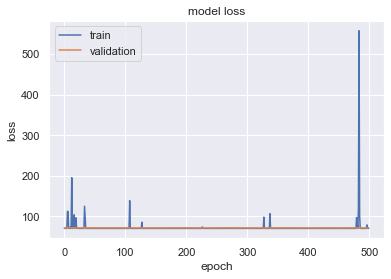

In [172]:
print(History.history.keys())
# "Loss"
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Building the model using a different value of epoch and batch size to avoid overfitting

In [174]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim =X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               16896     
_________________________________________________________________
dense_21 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 257       
Total params: 181,761
Trainable params: 181,761
Non-trainable params: 0
_________________________________________________________________


In [175]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [176]:
History= NN_model.fit(X_train,y_train, epochs=250, batch_size=40, validation_split = 0.2, callbacks=callbacks_list)

Train on 2683 samples, validate on 671 samples
Epoch 1/250
2683/2683 [==============================] - ETA: 13s - loss: 12998.0791 - mean_absolute_error: 12998.07 - ETA: 0s - loss: 71249.2293 - mean_absolute_error: 71249.2188 - ETA: 0s - loss: 45303.0383 - mean_absolute_error: 45303.031 - ETA: 0s - loss: 32618.3763 - mean_absolute_error: 32618.373 - ETA: 0s - loss: 26065.0045 - mean_absolute_error: 26065.002 - 1s 193us/step - loss: 22248.5831 - mean_absolute_error: 22248.5801 - val_loss: 6824.1708 - val_mean_absolute_error: 6824.1704

Epoch 00001: val_loss improved from inf to 6824.17082, saving model to Weights-001--6824.17082.hdf5
Epoch 2/250
2683/2683 [==============================] - ETA: 0s - loss: 7017.6616 - mean_absolute_error: 7017.661 - ETA: 0s - loss: 9071.7304 - mean_absolute_error: 9071.730 - ETA: 0s - loss: 6666.7139 - mean_absolute_error: 6666.713 - ETA: 0s - loss: 6029.0192 - mean_absolute_error: 6029.019 - ETA: 0s - loss: 5870.9537 - mean_absolute_error: 5870.953 - E

2683/2683 [==============================] - ETA: 0s - loss: 85.5615 - mean_absolute_error: 85.561 - ETA: 0s - loss: 90.4031 - mean_absolute_error: 90.403 - ETA: 0s - loss: 96.6114 - mean_absolute_error: 96.611 - ETA: 0s - loss: 95.0208 - mean_absolute_error: 95.020 - ETA: 0s - loss: 93.7933 - mean_absolute_error: 93.793 - ETA: 0s - loss: 93.7144 - mean_absolute_error: 93.714 - ETA: 0s - loss: 90.9163 - mean_absolute_error: 90.916 - 0s 134us/step - loss: 90.8608 - mean_absolute_error: 90.8609 - val_loss: 113.9991 - val_mean_absolute_error: 113.9991

Epoch 00027: val_loss did not improve from 81.27206
Epoch 28/250
2683/2683 [==============================] - ETA: 0s - loss: 124.5669 - mean_absolute_error: 124.566 - ETA: 0s - loss: 106.9683 - mean_absolute_error: 106.968 - ETA: 0s - loss: 102.3711 - mean_absolute_error: 102.371 - ETA: 0s - loss: 98.3210 - mean_absolute_error: 98.3210  - ETA: 0s - loss: 96.2884 - mean_absolute_error: 96.288 - ETA: 0s - loss: 98.2824 - mean_absolute_error:

2683/2683 [==============================] - ETA: 0s - loss: 62.6429 - mean_absolute_error: 62.642 - ETA: 0s - loss: 71.8004 - mean_absolute_error: 71.800 - ETA: 0s - loss: 75.3536 - mean_absolute_error: 75.353 - ETA: 0s - loss: 74.4335 - mean_absolute_error: 74.433 - ETA: 0s - loss: 77.7895 - mean_absolute_error: 77.789 - ETA: 0s - loss: 80.8285 - mean_absolute_error: 80.828 - ETA: 0s - loss: 82.6860 - mean_absolute_error: 82.686 - ETA: 0s - loss: 82.6261 - mean_absolute_error: 82.626 - 0s 163us/step - loss: 82.7746 - mean_absolute_error: 82.7746 - val_loss: 84.2624 - val_mean_absolute_error: 84.2624

Epoch 00053: val_loss did not improve from 80.36329
Epoch 54/250
2683/2683 [==============================] - ETA: 0s - loss: 132.5661 - mean_absolute_error: 132.566 - ETA: 0s - loss: 130.9856 - mean_absolute_error: 130.985 - ETA: 0s - loss: 177.3518 - mean_absolute_error: 177.351 - ETA: 0s - loss: 329.6916 - mean_absolute_error: 329.691 - ETA: 0s - loss: 336.5736 - mean_absolute_error: 

2683/2683 [==============================] - ETA: 0s - loss: 80.2214 - mean_absolute_error: 80.221 - ETA: 0s - loss: 85.0640 - mean_absolute_error: 85.064 - ETA: 0s - loss: 84.6583 - mean_absolute_error: 84.658 - ETA: 0s - loss: 86.1902 - mean_absolute_error: 86.190 - ETA: 0s - loss: 83.2096 - mean_absolute_error: 83.209 - ETA: 0s - loss: 80.7281 - mean_absolute_error: 80.728 - ETA: 0s - loss: 81.7387 - mean_absolute_error: 81.738 - 0s 141us/step - loss: 81.6911 - mean_absolute_error: 81.6911 - val_loss: 85.5226 - val_mean_absolute_error: 85.5226

Epoch 00080: val_loss did not improve from 79.95449
Epoch 81/250
2683/2683 [==============================] - ETA: 0s - loss: 64.5987 - mean_absolute_error: 64.598 - ETA: 0s - loss: 76.7561 - mean_absolute_error: 76.756 - ETA: 0s - loss: 78.2691 - mean_absolute_error: 78.269 - ETA: 0s - loss: 78.9744 - mean_absolute_error: 78.974 - ETA: 0s - loss: 80.9254 - mean_absolute_error: 80.925 - ETA: 0s - loss: 83.0862 - mean_absolute_error: 83.086 - 

2683/2683 [==============================] - ETA: 0s - loss: 92.1437 - mean_absolute_error: 92.143 - ETA: 0s - loss: 88.9749 - mean_absolute_error: 88.974 - ETA: 0s - loss: 86.2492 - mean_absolute_error: 86.249 - ETA: 0s - loss: 85.3926 - mean_absolute_error: 85.392 - ETA: 0s - loss: 85.7653 - mean_absolute_error: 85.765 - ETA: 0s - loss: 87.8547 - mean_absolute_error: 87.854 - ETA: 0s - loss: 85.8754 - mean_absolute_error: 85.875 - ETA: 0s - loss: 83.8513 - mean_absolute_error: 83.851 - 0s 153us/step - loss: 83.7900 - mean_absolute_error: 83.7900 - val_loss: 81.4051 - val_mean_absolute_error: 81.4051

Epoch 00107: val_loss did not improve from 79.80196
Epoch 108/250
2683/2683 [==============================] - ETA: 0s - loss: 95.1775 - mean_absolute_error: 95.177 - ETA: 0s - loss: 81.6086 - mean_absolute_error: 81.608 - ETA: 0s - loss: 78.2226 - mean_absolute_error: 78.222 - ETA: 0s - loss: 80.4154 - mean_absolute_error: 80.415 - ETA: 0s - loss: 82.6621 - mean_absolute_error: 82.662 -

2683/2683 [==============================] - ETA: 0s - loss: 92.2432 - mean_absolute_error: 92.243 - ETA: 0s - loss: 76.9093 - mean_absolute_error: 76.909 - ETA: 0s - loss: 79.0435 - mean_absolute_error: 79.043 - ETA: 0s - loss: 79.4874 - mean_absolute_error: 79.487 - ETA: 0s - loss: 79.5112 - mean_absolute_error: 79.511 - ETA: 0s - loss: 78.6910 - mean_absolute_error: 78.691 - ETA: 0s - loss: 79.9373 - mean_absolute_error: 79.937 - 0s 139us/step - loss: 80.6945 - mean_absolute_error: 80.6945 - val_loss: 80.5937 - val_mean_absolute_error: 80.5937

Epoch 00134: val_loss did not improve from 79.80196
Epoch 135/250
2683/2683 [==============================] - ETA: 0s - loss: 81.0427 - mean_absolute_error: 81.042 - ETA: 0s - loss: 75.6137 - mean_absolute_error: 75.613 - ETA: 0s - loss: 75.3175 - mean_absolute_error: 75.317 - ETA: 0s - loss: 79.1164 - mean_absolute_error: 79.116 - ETA: 0s - loss: 80.9094 - mean_absolute_error: 80.909 - ETA: 0s - loss: 82.2778 - mean_absolute_error: 82.277 -


Epoch 00147: val_loss did not improve from 79.80196
Epoch 148/250
2683/2683 [==============================] - ETA: 0s - loss: 73.3671 - mean_absolute_error: 73.367 - ETA: 0s - loss: 77.5217 - mean_absolute_error: 77.521 - ETA: 0s - loss: 77.9228 - mean_absolute_error: 77.922 - ETA: 0s - loss: 81.5580 - mean_absolute_error: 81.558 - ETA: 0s - loss: 81.0776 - mean_absolute_error: 81.077 - 0s 104us/step - loss: 82.4841 - mean_absolute_error: 82.4841 - val_loss: 81.0159 - val_mean_absolute_error: 81.0159

Epoch 00148: val_loss did not improve from 79.80196
Epoch 149/250
2683/2683 [==============================] - ETA: 0s - loss: 62.4322 - mean_absolute_error: 62.432 - ETA: 0s - loss: 91.8986 - mean_absolute_error: 91.898 - ETA: 0s - loss: 89.7120 - mean_absolute_error: 89.712 - ETA: 0s - loss: 87.3269 - mean_absolute_error: 87.326 - ETA: 0s - loss: 87.0009 - mean_absolute_error: 87.000 - ETA: 0s - loss: 86.3825 - mean_absolute_error: 86.382 - ETA: 0s - loss: 85.3410 - mean_absolute_erro

2683/2683 [==============================] - ETA: 0s - loss: 86.4951 - mean_absolute_error: 86.495 - ETA: 0s - loss: 78.3435 - mean_absolute_error: 78.343 - ETA: 0s - loss: 82.9462 - mean_absolute_error: 82.946 - ETA: 0s - loss: 85.4963 - mean_absolute_error: 85.496 - ETA: 0s - loss: 83.5446 - mean_absolute_error: 83.544 - ETA: 0s - loss: 86.3415 - mean_absolute_error: 86.341 - ETA: 0s - loss: 84.4054 - mean_absolute_error: 84.405 - ETA: 0s - loss: 82.7192 - mean_absolute_error: 82.719 - 0s 155us/step - loss: 82.6816 - mean_absolute_error: 82.6816 - val_loss: 83.5545 - val_mean_absolute_error: 83.5545

Epoch 00175: val_loss did not improve from 79.32240
Epoch 176/250
2683/2683 [==============================] - ETA: 0s - loss: 52.2660 - mean_absolute_error: 52.266 - ETA: 0s - loss: 80.3721 - mean_absolute_error: 80.372 - ETA: 0s - loss: 84.7776 - mean_absolute_error: 84.777 - ETA: 0s - loss: 82.0518 - mean_absolute_error: 82.051 - ETA: 0s - loss: 81.5430 - mean_absolute_error: 81.543 -

2683/2683 [==============================] - ETA: 0s - loss: 65.1341 - mean_absolute_error: 65.134 - ETA: 0s - loss: 84.8568 - mean_absolute_error: 84.856 - ETA: 0s - loss: 81.3361 - mean_absolute_error: 81.336 - ETA: 0s - loss: 80.1889 - mean_absolute_error: 80.188 - ETA: 0s - loss: 79.4862 - mean_absolute_error: 79.486 - ETA: 0s - loss: 78.2683 - mean_absolute_error: 78.268 - ETA: 0s - loss: 77.9904 - mean_absolute_error: 77.990 - ETA: 0s - loss: 80.3292 - mean_absolute_error: 80.329 - 0s 154us/step - loss: 80.3056 - mean_absolute_error: 80.3055 - val_loss: 81.1070 - val_mean_absolute_error: 81.1069

Epoch 00202: val_loss did not improve from 79.10912
Epoch 203/250
2683/2683 [==============================] - ETA: 0s - loss: 67.0553 - mean_absolute_error: 67.055 - ETA: 0s - loss: 73.7243 - mean_absolute_error: 73.724 - ETA: 0s - loss: 73.3669 - mean_absolute_error: 73.366 - ETA: 0s - loss: 77.8239 - mean_absolute_error: 77.823 - ETA: 0s - loss: 80.3741 - mean_absolute_error: 80.374 -

2683/2683 [==============================] - ETA: 0s - loss: 69.2574 - mean_absolute_error: 69.257 - ETA: 0s - loss: 87.9617 - mean_absolute_error: 87.961 - ETA: 0s - loss: 87.5287 - mean_absolute_error: 87.528 - ETA: 0s - loss: 81.8977 - mean_absolute_error: 81.897 - ETA: 0s - loss: 80.5854 - mean_absolute_error: 80.585 - ETA: 0s - loss: 79.8942 - mean_absolute_error: 79.894 - ETA: 0s - loss: 79.7548 - mean_absolute_error: 79.754 - 0s 139us/step - loss: 79.7367 - mean_absolute_error: 79.7367 - val_loss: 78.9346 - val_mean_absolute_error: 78.9346

Epoch 00229: val_loss did not improve from 78.36518
Epoch 230/250
2683/2683 [==============================] - ETA: 0s - loss: 63.5831 - mean_absolute_error: 63.583 - ETA: 0s - loss: 73.9609 - mean_absolute_error: 73.960 - ETA: 0s - loss: 75.2252 - mean_absolute_error: 75.225 - ETA: 0s - loss: 77.2534 - mean_absolute_error: 77.253 - ETA: 0s - loss: 78.5148 - mean_absolute_error: 78.514 - 0s 107us/step - loss: 79.6183 - mean_absolute_error: 79


Epoch 00242: val_loss did not improve from 77.92398
Epoch 243/250
2683/2683 [==============================] - ETA: 0s - loss: 310.6782 - mean_absolute_error: 310.678 - ETA: 0s - loss: 105.4036 - mean_absolute_error: 105.403 - ETA: 0s - loss: 91.5760 - mean_absolute_error: 91.5760  - ETA: 0s - loss: 90.2723 - mean_absolute_error: 90.272 - ETA: 0s - loss: 89.2021 - mean_absolute_error: 89.202 - ETA: 0s - loss: 87.5846 - mean_absolute_error: 87.584 - ETA: 0s - loss: 87.0867 - mean_absolute_error: 87.086 - ETA: 0s - loss: 85.1758 - mean_absolute_error: 85.175 - 0s 160us/step - loss: 84.7969 - mean_absolute_error: 84.7969 - val_loss: 82.6670 - val_mean_absolute_error: 82.6670

Epoch 00243: val_loss did not improve from 77.92398
Epoch 244/250
2683/2683 [==============================] - ETA: 0s - loss: 116.2692 - mean_absolute_error: 116.269 - ETA: 0s - loss: 82.0113 - mean_absolute_error: 82.0113  - ETA: 0s - loss: 77.2966 - mean_absolute_error: 77.296 - ETA: 0s - loss: 78.7600 - mean_abs

In [177]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [178]:
y_pred = NN_model.predict(X_test)

In [179]:
r2_score(y_test, y_pred)

-0.16243317555261827

In [181]:
NN_MAE = median_absolute_error(y_test,y_pred)
NN_MAE

45.36480712890625